In [11]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import glob
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats as st
from scipy.stats import norm
import statsmodels.formula.api as sm
import datetime
import re
import shutil
import string
from __future__ import division, print_function

now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d_%H:%M")
month = now.strftime("%B")

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
import sys
import seaborn as sns
%matplotlib inline
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [12]:
# Documentation available: https://github.com/ashkan25/Python-CSV-Column-Remover
def drop_last_column(df):
    if len(df.columns.values) == 0:
        return df
    last_col = df.columns[-1]
    if 'Unnamed' in last_col and df[last_col].isnull().all():
        return df.drop(last_col, axis=1)

    return df

## Importing Data From Each Trial, For Each Participant

In [13]:
# load the csv files into pandas
sleep_df = pd.DataFrame()

# starting dir
start_dir = os.getcwd() + "/data/"

# Get a list of dirs
participant_dirs = os.listdir( start_dir )

# for each folder in the glob
for participant in participant_dirs:
    # sanity check: make sure its a directory
    participant_path = start_dir + participant
    if os.path.isdir(participant_path):
        # for each csv in the folder
        part_glob = glob.glob( participant_path + "/*.csv" )

        # add to the table
        for csv in part_glob:
            df = pd.read_csv(csv)
            df = drop_last_column(df)
            sleep_df = sleep_df.append(df)


# check to make sure that csv content is added to data frame
sleep_df.head()


,cat.thisIndex,cat.thisN,cat.thisRepN,cat.thisTrialN,correct,date,expName,frameRate,key_resp_2.keys,key_resp_2.rt,key_resp_3.keys,key_resp_3.rt,key_resp_7.keys,key_resp_7.rt,key_resp_8.keys,key_resp_8.rt,key_resp_9.corr,key_resp_9.keys,key_resp_9.rt,participant,practice.thisIndex,practice.thisN,practice.thisRepN,practice.thisTrialN,session,stim1,stim2,ws.thisIndex,ws.thisN,ws.thisRepN,ws.thisTrialN
0,NaN,NaN,NaN,NaN,1.0,2015_Jun_13_1126,Stat_Cat_Oct,59.4568,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,6.90258,1.0,0.0,0.0,0.0,0.0,1.0,prac1.wav,prac2.wav,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2015_Jun_13_1126,Stat_Cat_Oct,59.4568,NaN,NaN,space,14.678775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,2.0,2015_Jun_13_1126,Stat_Cat_Oct,59.4568,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,0.558629,1.0,NaN,NaN,NaN,NaN,1.0,ws/19.wav,ws/1.wav,6.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,2.0,2015_Jun_13_1126,Stat_Cat_Oct,59.4568,['2'],[2.8283094843209255],NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,1.62566,1.0,NaN,NaN,NaN,NaN,1.0,ws/22.wav,ws/4.wav,10.0,1.0,0.0,1.0
4,NaN,NaN,NaN,NaN,1.0,2015_Jun_13_1126,Stat_Cat_Oct,59.4568,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2,0.117813,1.0,NaN,NaN,NaN,NaN,1.0,ws/1.wav,ws/10.wav,5.0,2.0,0.0,2.0


In [14]:
# get a list of all columns
cols = list(sleep_df)

# create a table with *only* the columns we want
sleep_columns = ['participant','stim1','stim2','correct','key_resp_2.keys','key_resp_9.keys','key_resp_9.corr','key_resp_9.rt','session']
sleep_df = sleep_df[sleep_columns]

print(start_dir)

# sanity chek
sleep_df.head()


/Users/landlab/Dropbox/sleep_stat_cat/data/


,participant,stim1,stim2,correct,key_resp_2.keys,key_resp_9.keys,key_resp_9.corr,key_resp_9.rt,session
0,1.0,prac1.wav,prac2.wav,1.0,None,2,0.0,6.90258,1.0
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,1.0,ws/19.wav,ws/1.wav,2.0,None,1,0.0,0.558629,1.0
3,1.0,ws/22.wav,ws/4.wav,2.0,['2'],2,1.0,1.62566,1.0
4,1.0,ws/1.wav,ws/10.wav,1.0,None,2,0.0,0.117813,1.0


In [15]:
# remove Nan lines in order to make finding type and version less error prone
# we'll do this by removing the rows that have stim[1&&2] set to NaN
sleep_df = sleep_df[pd.notnull(sleep_df['stim1']) & pd.notnull(sleep_df['stim2'])]

sleep_df.head()

,participant,stim1,stim2,correct,key_resp_2.keys,key_resp_9.keys,key_resp_9.corr,key_resp_9.rt,session
0,1.0,prac1.wav,prac2.wav,1.0,None,2,0.0,6.90258,1.0
2,1.0,ws/19.wav,ws/1.wav,2.0,None,1,0.0,0.558629,1.0
3,1.0,ws/22.wav,ws/4.wav,2.0,['2'],2,1.0,1.62566,1.0
4,1.0,ws/1.wav,ws/10.wav,1.0,None,2,0.0,0.117813,1.0
5,1.0,ws/4.wav,ws/13.wav,1.0,['1'],1,1.0,0.425549,1.0


## Adding columns to indicate type, version

In [16]:
# create a dataframe from the key file, try to do a table join SQL kinda thing
# you already know the path to the key
key_path = os.getcwd() + "/key/key.csv"
key_df = pd.read_csv(key_path)

# because we're going to use join, take out the columns you want
key_cols = ['stim1','stim2', 'notes_novword_2', 'TP_novword1','type','version']
key_df = key_df[key_cols]

key_df.head()



,stim1,stim2,notes_novword_2,TP_novword1,type,version
0,ws/1.wav,ws/10.wav,NaN,0.0,non_w,1
1,ws/1.wav,ws/34.wav,non_w_ss,0.0,non_w,1
2,ws/12.wav,ws/3.wav,NaN,0.0,non_w,1
3,ws/3.wav,ws/29.wav,non_w_ss,0.0,non_w,1
4,ws/31.wav,ws/4.wav,non_w_ss,0.0,non_w,1


In [17]:
## merge the two data frames on both the stim_1 and stim_2 values
join_df = pd.merge(sleep_df, key_df, on=['stim1', 'stim2'], how='outer')
join_df.sort_values('participant', inplace=True)
join_df.reset_index(drop=True, inplace=True)

In [18]:
#sanity check

join_df.head(10)

,participant,stim1,stim2,correct,key_resp_2.keys,key_resp_9.keys,key_resp_9.corr,key_resp_9.rt,session,notes_novword_2,TP_novword1,type,version
0,1.0,prac1.wav,prac2.wav,1.0,None,2,0.0,6.90258,1.0,NaN,NaN,NaN,NaN
1,1.0,cat/1-14-9.wav,cat/1-10-9.wav,1.0,NaN,1,1.0,0.477008,1.0,10,14.0,three_2nov_2cong,1.0
2,1.0,ws/1.wav,ws/34.wav,1.0,None,2,0.0,1.12029,1.0,non_w_ss,0.0,non_w,1.0
3,1.0,cat/3-15-9.wav,cat/3-22-9.wav,1.0,NaN,2,0.0,0.542049,1.0,22,15.0,three_2nov_1cong_1incong,1.0
4,1.0,cat/10-4-9.wav,cat/13-4-9.wav,1.0,NaN,1,1.0,0.441135,1.0,13,10.0,three_2nov_2cong,1.0
5,1.0,cat/149.wav,cat/194.wav,1.0,NaN,2,0.0,0.576717,1.0,NaN,NaN,order_TP33,1.0
6,1.0,cat/4-18-1.wav,cat/4-1-18.wav,1.0,NaN,1,1.0,0.0839894,1.0,NaN,18.0,three_1nov_1cong,1.0
7,1.0,ws/3.wav,ws/29.wav,1.0,['2'],None,0.0,NaN,1.0,non_w_ss,0.0,non_w,1.0
8,1.0,cat/11-4-9.wav,cat/21-4-9.wav,1.0,NaN,2,0.0,0.38818,1.0,21,11.0,three_2nov_1cong_1incong,1.0
9,1.0,cat/3-9-14.wav,cat/3-14-9.wav,2.0,NaN,2,1.0,3.00133,1.0,NaN,14.0,three_1nov_1cong,1.0


In [19]:
# before we can fix the correct column, we need to fix the mapping, i.e. convert the list vals to their ints
join_df['key_resp_2.keys'] = join_df['key_resp_2.keys'].map({"['1']": 1, "['2']": 2, 1: 1, 2: 2, '1': 1, '2': 2, 'None': 'None'})
join_df['key_resp_9.keys'] = join_df['key_resp_9.keys'].map({"['1']": 1, "['2']": 2, 1: 1, 2: 2, '1': 1, '2': 2, 'None': 'None'})

# for key_resp_9.rt, we need to extract the ints stuck in strings
# a little unstable, but here's what this does
# for all values in key_resp_9.rt, if its a string, assuming that it's a list in a string, extract and cast the value in the list to an int
join_df = join_df.rename(columns = {'key_resp_9.rt':'key_resp_9_rt'})
join_df['key_resp_9_rt'] = join_df.apply( lambda row: ( (float(row['key_resp_9_rt'][1:row['key_resp_9_rt'].find(',')]) if row['key_resp_9_rt'].find(',') > -1
                                                        else float(row['key_resp_9_rt'][1:-1]))
                                                           if isinstance( row['key_resp_9_rt'], str ) == True 
                                                           else row['key_resp_9_rt'] ), axis=1 )

# the correct condition is that each correct must be equal to its corresponding key value, unless its equal to 0
# rename 'key_resp_9.keys' to make indexing easier
join_df = join_df.rename(columns = {'key_resp_9.keys':'key_resp_9'})
join_df.loc[join_df.correct == join_df.key_resp_9, 'key_resp_9.corr'] = 1
join_df.loc[join_df.correct != join_df.key_resp_9, 'key_resp_9.corr'] = 0
join_df.loc[join_df.key_resp_9 == 'None', 'key_resp_9.corr'] = np.NaN

join_df.head(10)

,participant,stim1,stim2,correct,key_resp_2.keys,key_resp_9,key_resp_9.corr,key_resp_9_rt,session,notes_novword_2,TP_novword1,type,version
0,1.0,prac1.wav,prac2.wav,1.0,None,2,0.0,6.902582,1.0,NaN,NaN,NaN,NaN
1,1.0,cat/1-14-9.wav,cat/1-10-9.wav,1.0,NaN,1,1.0,0.477008,1.0,10,14.0,three_2nov_2cong,1.0
2,1.0,ws/1.wav,ws/34.wav,1.0,None,2,0.0,1.120285,1.0,non_w_ss,0.0,non_w,1.0
3,1.0,cat/3-15-9.wav,cat/3-22-9.wav,1.0,NaN,2,0.0,0.542049,1.0,22,15.0,three_2nov_1cong_1incong,1.0
4,1.0,cat/10-4-9.wav,cat/13-4-9.wav,1.0,NaN,1,1.0,0.441135,1.0,13,10.0,three_2nov_2cong,1.0
5,1.0,cat/149.wav,cat/194.wav,1.0,NaN,2,0.0,0.576717,1.0,NaN,NaN,order_TP33,1.0
6,1.0,cat/4-18-1.wav,cat/4-1-18.wav,1.0,NaN,1,1.0,0.083989,1.0,NaN,18.0,three_1nov_1cong,1.0
7,1.0,ws/3.wav,ws/29.wav,1.0,2,None,NaN,NaN,1.0,non_w_ss,0.0,non_w,1.0
8,1.0,cat/11-4-9.wav,cat/21-4-9.wav,1.0,NaN,2,0.0,0.388180,1.0,21,11.0,three_2nov_1cong_1incong,1.0
9,1.0,cat/3-9-14.wav,cat/3-14-9.wav,2.0,NaN,2,1.0,3.001331,1.0,NaN,14.0,three_1nov_1cong,1.0


In [20]:
# Types for creating type_all column
types = {'three_1nov_1cong': 'all_three', 'three_2nov_2cong': 'all_three', 'three_2nov_1cong_1incong': 'all_three',
         'part_w': 'all_word_seg', 'non_w': 'all_word_seg', 'order_TP33': 'order', np.nan: np.nan}

# Create new column where the value for each row depends on the value for column type
join_df['type_all'] = join_df.apply(lambda row: types[row['type']], axis=1)

# DataFrame with type_all column added
join_df.head()


,participant,stim1,stim2,correct,key_resp_2.keys,key_resp_9,key_resp_9.corr,key_resp_9_rt,session,notes_novword_2,TP_novword1,type,version,type_all
0,1.0,prac1.wav,prac2.wav,1.0,None,2,0.0,6.902582,1.0,NaN,NaN,NaN,NaN,NaN
1,1.0,cat/1-14-9.wav,cat/1-10-9.wav,1.0,NaN,1,1.0,0.477008,1.0,10,14.0,three_2nov_2cong,1.0,all_three
2,1.0,ws/1.wav,ws/34.wav,1.0,None,2,0.0,1.120285,1.0,non_w_ss,0.0,non_w,1.0,all_word_seg
3,1.0,cat/3-15-9.wav,cat/3-22-9.wav,1.0,NaN,2,0.0,0.542049,1.0,22,15.0,three_2nov_1cong_1incong,1.0,all_three
4,1.0,cat/10-4-9.wav,cat/13-4-9.wav,1.0,NaN,1,1.0,0.441135,1.0,13,10.0,three_2nov_2cong,1.0,all_three


### Output data to csv

In [21]:
join_df.to_csv('output.csv')

# Create pivot table for each session & version combination and merge together into one table

In [22]:
# Dictionary used to create each grouping of columns depending on the session and version
# First tuple represents the sessions and the second tuple represents the versions. 
types = {'all_type': [(1, 2), (1, 2)], 's_all_v_1': [(1, 2), (1,)], 's_all_v_2': [(1, 2), (2,)],
         's_1_v_all': [(1,), (1, 2)], 's_2_v_all': [(2,), (1, 2)], 's_1_v_1': [(1,), (1,)], 's_1_v_2': [(1,), (2,)],
         's_2_v_1': [(2,), (1,)], 's_2_v_2': [(2,), (2,)]}

# Start off with a column of all participants
# Remove any duplicates so that each participant only appears once
sleep_df = join_df['participant'].drop_duplicates().to_frame()

# Table with only a column of participants
sleep_df.head()

,participant
0,1.0
40,2.0
64,3.0
120,4.0
160,101.0


In [23]:
# Go through each session and version combination and create a pivot table for it and merge it with sleep_df DataFrame
for key in types:

    # Only select the rows from the output that match the session and version wanted
    session_version_df = join_df.loc[
        join_df['session'].isin(types[key][0]) & join_df['version'].isin(types[key][1])]

    # Table with rows that satisfy the required sessions and version
    # print session_version_df.head()

    # Create a pivot table using participants as the index, columns as the different types and the values as the mean
    # of the grouped key_resp_9.corr
    type_df = session_version_df.pivot_table(index='participant', columns='type', values='key_resp_9.corr',
                                             aggfunc='mean')

    # column for grand total average for all sessions and versions
    type_df['grand_total'] = session_version_df.groupby(['participant']).mean()['key_resp_9.corr']

    # Rename column names by appending the key (session and version combination) to the end of each column
    for column in type_df.columns.values:
        type_df.rename(columns={column: '%s_%s' % (column, key)}, inplace=True)

    # Add a column for the participants to the pivot table so that it can be merged with sleep_df using participants
    type_df['participant'] = type_df.index.values

    # Pivot Table with column names renamed and participant column added
    # print type_df.head()

    # Merge the pivot table with sleep_df using the participant column
    # The value NaN will be set if there is no data for the participant for the given session and version
    sleep_df = pd.merge(sleep_df, type_df, how='left', on=['participant'])
    
# Table with all session and version combinations
sleep_df.head()

,participant,non_w_s_2_v_1,order_TP33_s_2_v_1,part_w_s_2_v_1,three_1nov_1cong_s_2_v_1,three_2nov_1cong_1incong_s_2_v_1,three_2nov_2cong_s_2_v_1,grand_total_s_2_v_1,non_w_s_all_v_1,order_TP33_s_all_v_1,part_w_s_all_v_1,three_1nov_1cong_s_all_v_1,three_2nov_1cong_1incong_s_all_v_1,three_2nov_2cong_s_all_v_1,grand_total_s_all_v_1,non_w_s_all_v_2,order_TP33_s_all_v_2,part_w_s_all_v_2,three_1nov_1cong_s_all_v_2,three_2nov_1cong_1incong_s_all_v_2,three_2nov_2cong_s_all_v_2,grand_total_s_all_v_2,non_w_s_1_v_2,order_TP33_s_1_v_2,part_w_s_1_v_2,three_1nov_1cong_s_1_v_2,three_2nov_1cong_1incong_s_1_v_2,three_2nov_2cong_s_1_v_2,grand_total_s_1_v_2,non_w_s_1_v_all,order_TP33_s_1_v_all,part_w_s_1_v_all,three_1nov_1cong_s_1_v_all,three_2nov_1cong_1incong_s_1_v_all,three_2nov_2cong_s_1_v_all,grand_total_s_1_v_all,non_w_s_2_v_2,order_TP33_s_2_v_2,part_w_s_2_v_2,three_1nov_1cong_s_2_v_2,three_2nov_1cong_1incong_s_2_v_2,three_2nov_2cong_s_2_v_2,grand_total_s_2_v_2,non_w_all_type,order_TP33_all_type,part_w_all_type,three_1nov_1cong_all_type,three_2nov_1cong_1incong_all_type,three_2nov_2cong_all_type,grand_total_all_type,non_w_s_2_v_all,order_TP33_s_2_v_all,part_w_s_2_v_all,three_1nov_1cong_s_2_v_all,three_2nov_1cong_1incong_s_2_v_all,three_2nov_2cong_s_2_v_all,grand_total_s_2_v_all,non_w_s_1_v_1,order_TP33_s_1_v_1,part_w_s_1_v_1,three_1nov_1cong_s_1_v_1,three_2nov_1cong_1incong_s_1_v_1,three_2nov_2cong_s_1_v_1,grand_total_s_1_v_1
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.500000,0.333333,0.555556,0.500000,0.600000,0.542857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.500000,0.333333,0.555556,0.500000,0.600000,0.542857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.500000,0.333333,0.555556,0.500000,0.600000,0.542857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.500000,0.333333,0.555556,0.500000,0.600000,0.542857
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,0.5,NaN,NaN,NaN,0.500000,0.5,NaN,0.5,NaN,NaN,NaN,0.5,0.500000,NaN,0.500000,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.500000,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444444,0.166667,0.333333,0.400000,0.571429,0.666667,0.431818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444444,0.166667,0.333333,0.400000,0.571429,0.666667,0.431818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444444,0.166667,0.333333,0.400000,0.571429,0.666667,0.431818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444444,0.166667,0.333333,0.400000,0.571429,0.666667,0.431818
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429,0.666667,0.500000,0.666667,0.166667,0.500000,0.526316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429,0.666667,0.500000,0.666667,0.166667,0.500000,0.526316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429,0.666667,0.500000,0.666667,0.166667,0.500000,0.526316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429,0.666667,0.500000,0.666667,0.166667,0.500000,0.526316
4,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375000,0.666667,0.250000,0.333333,0.600000,0.500000,0.447368,0.4,0.583333,1.0,0.888889,0.666667,0.666667,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375000,0.666667,0.250000,0.333333,0.600000,0.500000,0.447368,0.4,0.583333,1.0,0.888889,0.666667,0.666667,0.666667,0.388889,0.611111,0.666667,0.611111,0.636364,0.583333,0.569767,0.4,0.583333,1.0,0.888889,0.666667,0.666667,0.666667,0.375000,0.666667,0.250000,0.333333,0.600000,0.500000,0.447368


# Read participants CSV and combine with above table

In [24]:
# Load the participant CSV file into Pandas
participant_df = pd.read_csv("participants.csv")

participant_df.head()

,participant,age_group,condition
0,101,1,QW
1,102,1,QW
2,103,1,QW
3,104,1,QW
4,105,1,QW


In [25]:
# Do a join on 'participant' for the 2 tables
new_output = pd.merge(participant_df, sleep_df, on="participant")

new_output.head()

,participant,age_group,condition,non_w_s_2_v_1,order_TP33_s_2_v_1,part_w_s_2_v_1,three_1nov_1cong_s_2_v_1,three_2nov_1cong_1incong_s_2_v_1,three_2nov_2cong_s_2_v_1,grand_total_s_2_v_1,non_w_s_all_v_1,order_TP33_s_all_v_1,part_w_s_all_v_1,three_1nov_1cong_s_all_v_1,three_2nov_1cong_1incong_s_all_v_1,three_2nov_2cong_s_all_v_1,grand_total_s_all_v_1,non_w_s_all_v_2,order_TP33_s_all_v_2,part_w_s_all_v_2,three_1nov_1cong_s_all_v_2,three_2nov_1cong_1incong_s_all_v_2,three_2nov_2cong_s_all_v_2,grand_total_s_all_v_2,non_w_s_1_v_2,order_TP33_s_1_v_2,part_w_s_1_v_2,three_1nov_1cong_s_1_v_2,three_2nov_1cong_1incong_s_1_v_2,three_2nov_2cong_s_1_v_2,grand_total_s_1_v_2,non_w_s_1_v_all,order_TP33_s_1_v_all,part_w_s_1_v_all,three_1nov_1cong_s_1_v_all,three_2nov_1cong_1incong_s_1_v_all,three_2nov_2cong_s_1_v_all,grand_total_s_1_v_all,non_w_s_2_v_2,order_TP33_s_2_v_2,part_w_s_2_v_2,three_1nov_1cong_s_2_v_2,three_2nov_1cong_1incong_s_2_v_2,three_2nov_2cong_s_2_v_2,grand_total_s_2_v_2,non_w_all_type,order_TP33_all_type,part_w_all_type,three_1nov_1cong_all_type,three_2nov_1cong_1incong_all_type,three_2nov_2cong_all_type,grand_total_all_type,non_w_s_2_v_all,order_TP33_s_2_v_all,part_w_s_2_v_all,three_1nov_1cong_s_2_v_all,three_2nov_1cong_1incong_s_2_v_all,three_2nov_2cong_s_2_v_all,grand_total_s_2_v_all,non_w_s_1_v_1,order_TP33_s_1_v_1,part_w_s_1_v_1,three_1nov_1cong_s_1_v_1,three_2nov_1cong_1incong_s_1_v_1,three_2nov_2cong_s_1_v_1,grand_total_s_1_v_1
0,101,1,QW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375,0.666667,0.25,0.333333,0.600000,0.500000,0.447368,0.4,0.583333,1.0,0.888889,0.666667,0.666667,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375,0.666667,0.25,0.333333,0.600000,0.500000,0.447368,0.4,0.583333,1.0,0.888889,0.666667,0.666667,0.666667,0.388889,0.611111,0.666667,0.611111,0.636364,0.583333,0.569767,0.40,0.583333,1.00,0.888889,0.666667,0.666667,0.666667,0.375,0.666667,0.25,0.333333,0.6,0.5,0.447368
1,102,1,QW,0.75,0.333333,0.75,1.000000,0.500000,0.333333,0.641026,0.750,0.333333,0.75,1.000000,0.500000,0.333333,0.641026,0.6,0.666667,0.5,0.555556,0.500000,0.833333,0.617021,0.6,0.666667,0.5,0.555556,0.500000,0.833333,0.617021,0.600,0.666667,0.50,0.555556,0.500000,0.833333,0.617021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.555556,0.625000,0.777778,0.500000,0.583333,0.627907,0.75,0.333333,0.75,1.000000,0.500000,0.333333,0.641026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,1,QW,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.250,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.600,0.416667,0.60,0.333333,0.833333,0.666667,0.541667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444444,0.444444,0.555556,0.444444,0.750000,0.583333,0.517241,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,1,QW,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.250,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.600,0.416667,0.60,0.333333,0.833333,0.666667,0.541667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444444,0.444444,0.555556,0.444444,0.750000,0.583333,0.517241,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,1,QW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,0.416667,0.6,0.333333,0.666667,0.833333,0.479167,0.3,0.416667,0.6,0.333333,0.666667,0.833333,0.479167,0.300,0.416667,0.60,0.333333,0.666667,0.833333,0.479167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,0.416667,0.600000,0.333333,0.666667,0.833333,0.479167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Replace 'Nap90' and 'Nap50' conditions with '90Nap' and '50Nap'
new_output = new_output.replace({"condition": {"Nap90": "90Nap", "Nap50": "50Nap"}})

# Output data to CSV

In [27]:
new_output.to_csv('summary.csv', index=False)

# VISUALIZATION IN R

In [28]:
%%R

library(reshape2)
library(Hmisc)
library(ggplot2)

#prepare word seg data
summary <- read.csv("summary.csv")

#summary for younger
younger <- subset(summary, age_group==1)

#summary for older
older <- subset(summary, age_group==2)

/Users/landlab/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: lattice

  warnings.warn(x, RRuntimeWarning)
/Users/landlab/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: survival

  warnings.warn(x, RRuntimeWarning)
/Users/landlab/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: Formula

  warnings.warn(x, RRuntimeWarning)
/Users/landlab/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/Users/landlab/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: 
Attaching package: ‘Hmisc’


  warnings.warn(x, RRuntimeWarning)
/Users/landlab/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: The following objects are masked from

In [29]:
%R head(younger)

,participant,age_group,condition,non_w_s_2_v_1,order_TP33_s_2_v_1,part_w_s_2_v_1,three_1nov_1cong_s_2_v_1,three_2nov_1cong_1incong_s_2_v_1,three_2nov_2cong_s_2_v_1,grand_total_s_2_v_1,non_w_s_all_v_1,order_TP33_s_all_v_1,part_w_s_all_v_1,three_1nov_1cong_s_all_v_1,three_2nov_1cong_1incong_s_all_v_1,three_2nov_2cong_s_all_v_1,grand_total_s_all_v_1,non_w_s_all_v_2,order_TP33_s_all_v_2,part_w_s_all_v_2,three_1nov_1cong_s_all_v_2,three_2nov_1cong_1incong_s_all_v_2,three_2nov_2cong_s_all_v_2,grand_total_s_all_v_2,non_w_s_1_v_2,order_TP33_s_1_v_2,part_w_s_1_v_2,three_1nov_1cong_s_1_v_2,three_2nov_1cong_1incong_s_1_v_2,three_2nov_2cong_s_1_v_2,grand_total_s_1_v_2,non_w_s_1_v_all,order_TP33_s_1_v_all,part_w_s_1_v_all,three_1nov_1cong_s_1_v_all,three_2nov_1cong_1incong_s_1_v_all,three_2nov_2cong_s_1_v_all,grand_total_s_1_v_all,non_w_s_2_v_2,order_TP33_s_2_v_2,part_w_s_2_v_2,three_1nov_1cong_s_2_v_2,three_2nov_1cong_1incong_s_2_v_2,three_2nov_2cong_s_2_v_2,grand_total_s_2_v_2,non_w_all_type,order_TP33_all_type,part_w_all_type,three_1nov_1cong_all_type,three_2nov_1cong_1incong_all_type,three_2nov_2cong_all_type,grand_total_all_type,non_w_s_2_v_all,order_TP33_s_2_v_all,part_w_s_2_v_all,three_1nov_1cong_s_2_v_all,three_2nov_1cong_1incong_s_2_v_all,three_2nov_2cong_s_2_v_all,grand_total_s_2_v_all,non_w_s_1_v_1,order_TP33_s_1_v_1,part_w_s_1_v_1,three_1nov_1cong_s_1_v_1,three_2nov_1cong_1incong_s_1_v_1,three_2nov_2cong_s_1_v_1,grand_total_s_1_v_1
1,101,1,QW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375,0.666667,0.25,0.333333,0.600000,0.500000,0.447368,0.4,0.583333,1.0,0.888889,0.666667,0.666667,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375,0.666667,0.25,0.333333,0.600000,0.500000,0.447368,0.4,0.583333,1.0,0.888889,0.666667,0.666667,0.666667,0.388889,0.611111,0.666667,0.611111,0.636364,0.583333,0.569767,0.40,0.583333,1.00,0.888889,0.666667,0.666667,0.666667,0.375,0.666667,0.25,0.333333,0.6,0.5,0.447368
2,102,1,QW,0.75,0.333333,0.75,1.000000,0.500000,0.333333,0.641026,0.750,0.333333,0.75,1.000000,0.500000,0.333333,0.641026,0.6,0.666667,0.5,0.555556,0.500000,0.833333,0.617021,0.6,0.666667,0.5,0.555556,0.500000,0.833333,0.617021,0.600,0.666667,0.50,0.555556,0.500000,0.833333,0.617021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.555556,0.625000,0.777778,0.500000,0.583333,0.627907,0.75,0.333333,0.75,1.000000,0.500000,0.333333,0.641026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,1,QW,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.250,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.600,0.416667,0.60,0.333333,0.833333,0.666667,0.541667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444444,0.444444,0.555556,0.444444,0.750000,0.583333,0.517241,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,103,1,QW,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.250,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.600,0.416667,0.60,0.333333,0.833333,0.666667,0.541667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444444,0.444444,0.555556,0.444444,0.750000,0.583333,0.517241,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,104,1,QW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,0.416667,0.6,0.333333,0.666667,0.833333,0.479167,0.3,0.416667,0.6,0.333333,0.666667,0.833333,0.479167,0.300,0.416667,0.60,0.333333,0.666667,0.833333,0.479167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,0.416667,0.600000,0.333333,0.666667,0.833333,0.479167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,105,1,QW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,0.333333,1.00,0.666667,0.500000,0.500000,0.641026,0.4,0.583333,0.6,0.444444,0.666667,0.833333,0.562500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,0.333333,1.00,0.666667,0.500000,0.500000,0.641026,0.4,0.583333,0.6,0.444444,0.666667,0.833333,0.562500,0.611111,0.500000,0.777778,0.555556,0.583333,0.666667,0.59770

In [30]:
%R head(older)

,participant,age_group,condition,non_w_s_2_v_1,order_TP33_s_2_v_1,part_w_s_2_v_1,three_1nov_1cong_s_2_v_1,three_2nov_1cong_1incong_s_2_v_1,three_2nov_2cong_s_2_v_1,grand_total_s_2_v_1,non_w_s_all_v_1,order_TP33_s_all_v_1,part_w_s_all_v_1,three_1nov_1cong_s_all_v_1,three_2nov_1cong_1incong_s_all_v_1,three_2nov_2cong_s_all_v_1,grand_total_s_all_v_1,non_w_s_all_v_2,order_TP33_s_all_v_2,part_w_s_all_v_2,three_1nov_1cong_s_all_v_2,three_2nov_1cong_1incong_s_all_v_2,three_2nov_2cong_s_all_v_2,grand_total_s_all_v_2,non_w_s_1_v_2,order_TP33_s_1_v_2,part_w_s_1_v_2,three_1nov_1cong_s_1_v_2,three_2nov_1cong_1incong_s_1_v_2,three_2nov_2cong_s_1_v_2,grand_total_s_1_v_2,non_w_s_1_v_all,order_TP33_s_1_v_all,part_w_s_1_v_all,three_1nov_1cong_s_1_v_all,three_2nov_1cong_1incong_s_1_v_all,three_2nov_2cong_s_1_v_all,grand_total_s_1_v_all,non_w_s_2_v_2,order_TP33_s_2_v_2,part_w_s_2_v_2,three_1nov_1cong_s_2_v_2,three_2nov_1cong_1incong_s_2_v_2,three_2nov_2cong_s_2_v_2,grand_total_s_2_v_2,non_w_all_type,order_TP33_all_type,part_w_all_type,three_1nov_1cong_all_type,three_2nov_1cong_1incong_all_type,three_2nov_2cong_all_type,grand_total_all_type,non_w_s_2_v_all,order_TP33_s_2_v_all,part_w_s_2_v_all,three_1nov_1cong_s_2_v_all,three_2nov_1cong_1incong_s_2_v_all,three_2nov_2cong_s_2_v_all,grand_total_s_2_v_all,non_w_s_1_v_1,order_TP33_s_1_v_1,part_w_s_1_v_1,three_1nov_1cong_s_1_v_1,three_2nov_1cong_1incong_s_1_v_1,three_2nov_2cong_s_1_v_1,grand_total_s_1_v_1
28,305,2,90Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,0.500000,0.500000,0.500000,0.600000,0.333333,0.513514,0.400,0.583333,0.600000,0.555556,0.833333,0.166667,0.520833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625,0.500000,0.500000,0.500000,0.600000,0.333333,0.513514,0.4,0.583333,0.6,0.555556,0.833333,0.166667,0.520833,0.500000,0.555556,0.555556,0.529412,0.727273,0.250000,0.517647,0.400000,0.583333,0.600000,0.555556,0.833333,0.166667,0.520833,0.625,0.5,0.5,0.5,0.6,0.333333,0.513514
29,307,2,pilot,0.625000,0.333333,0.750000,0.444444,0.500000,0.500000,0.512821,0.625000,0.333333,0.750000,0.444444,0.500000,0.500000,0.512821,0.800,0.666667,0.400000,0.444444,0.833333,0.833333,0.666667,0.800,0.666667,0.400000,0.444444,0.833333,0.833333,0.666667,0.800,0.666667,0.400000,0.444444,0.833333,0.833333,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.722222,0.555556,0.555556,0.444444,0.666667,0.666667,0.597701,0.625000,0.333333,0.750000,0.444444,0.500000,0.500000,0.512821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,308,2,QW,0.142857,0.333333,0.333333,0.666667,0.666667,0.500000,0.459459,0.142857,0.333333,0.333333,0.666667,0.666667,0.500000,0.459459,0.600,0.416667,0.333333,0.333333,0.500000,0.666667,0.478261,0.600,0.416667,0.333333,0.333333,0.500000,0.666667,0.478261,0.600,0.416667,0.333333,0.333333,0.500000,0.666667,0.478261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.411765,0.388889,0.333333,0.500000,0.583333,0.583333,0.469880,0.142857,0.333333,0.333333,0.666667,0.666667,0.500000,0.459459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,309,2,pilot,0.714286,0.666667,0.000000,0.777778,0.333333,0.666667,0.611111,0.714286,0.666667,0.000000,0.777778,0.333333,0.666667,0.611111,0.875,0.500000,0.000000,0.375000,0.500000,0.333333,0.488372,0.875,0.500000,0.000000,0.375000,0.500000,0.333333,0.488372,0.875,0.500000,0.000000,0.375000,0.500000,0.333333,0.488372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000,0.555556,0.000000,0.588235,0.416667,0.500000,0.544304,0.714286,0.666667,0.000000,0.777778,0.333333,0.666667,0.611111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,310,2,pilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400,0.250000,0.200000,0.333333,0.333333,0.500000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,0.250000,0.2,0.333333,0.333333,0.500000,0.333333,0.400000,0.250000,0.200000,0.333333,0.333333,0.500000,0.333333,0.400000,0.250000,0.200000,0.333333,0.333333,0.500000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,312,2,pilot,0.571429,0.833333,1.000000,0.444444,0.400000,0.666667,0.611111,0.571429,0.833333,1.000000,0.444444,0.400000,0.666667,0.611111,0.875,0.250000,0.800000,0.57142

## AGE AND SESSION AND VERSION

### Non Words Percent Correct

In [31]:
%R wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('non_w_s_1_v_1','non_w_s_1_v_2','non_w_s_2_v_1','non_w_s_2_v_2'))

%R head(wordseg.m)

,age_group,variable,value
1,1,non_w_s_1_v_1,0.375
2,1,non_w_s_1_v_1,NaN
3,1,non_w_s_1_v_1,NaN
4,1,non_w_s_1_v_1,NaN
5,1,non_w_s_1_v_1,NaN
6,1,non_w_s_1_v_1,0.875


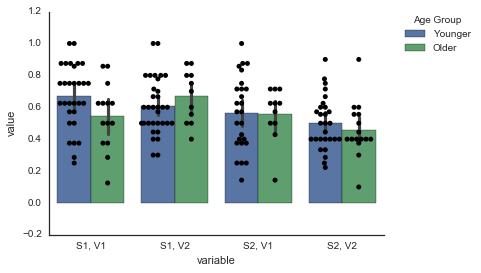

In [32]:
my_table = %R wordseg.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1, 2, 3], ['S1, V1', 'S1, V2', 'S2, V1', 'S2, V2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

#### Accuracy by Sess and Vers, non_words

#### Average percent correct, non words

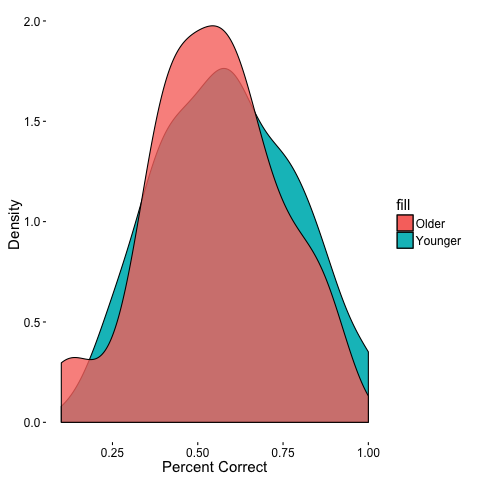

In [33]:
%%R 

#histrogram
ggplot(wordseg.m, (aes(x=value))) +
#   geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1") +
#   geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8) +
  geom_density(data=subset(wordseg.m, age_group == 1), aes(fill="Younger")) +
  geom_density(data=subset(wordseg.m, age_group == 2), alpha =.8, aes(fill="Older")) +
  scale_colour_manual(name="GROUPS",values=cols) +
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic() +
  theme(text = element_text(size = 15)) +
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Graph by session 1 and 2, non_words

In [34]:
%R sess_ws.m <- melt(summary,id.vars='age_group', measure.vars=c('non_w_s_1_v_all','non_w_s_2_v_all'))
%R head(sess_ws.m)

,age_group,variable,value
1,1,non_w_s_1_v_all,0.375
2,1,non_w_s_1_v_all,0.600
3,1,non_w_s_1_v_all,0.600
4,1,non_w_s_1_v_all,0.600
5,1,non_w_s_1_v_all,0.300
6,1,non_w_s_1_v_all,0.875


#### Accuracy by Sess, non_words

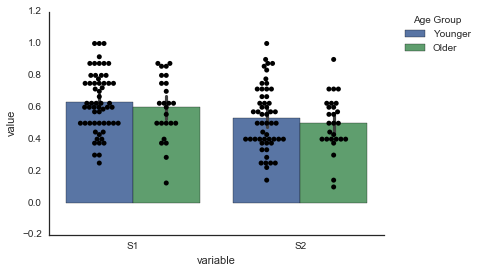

In [35]:
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

#### Learning scores by session, version and age, non_words

In [36]:
%%R
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 4.9425, df = 168, p-value = 1.854e-06
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5450932 0.6050759
sample estimates:
mean of x 
0.5750845 



In [37]:
%%R
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_all
t = 5.9907, df = 83, p-value = 5.169e-08
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5823202 0.6641495
sample estimates:
mean of x 
0.6232348 



In [38]:
%%R
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_2_v_all
t = 0.98162, df = 80, p-value = 0.3292
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4785999 0.5630619
sample estimates:
mean of x 
0.5208309 



In [39]:
%%R
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$non_w_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$non_w_s_all_v_1
t = 4.1745, df = 80, p-value = 7.546e-05
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5514280 0.6451329
sample estimates:
mean of x 
0.5982804 



In [40]:
%%R
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$non_w_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$non_w_s_all_v_2
t = 2.728, df = 85, p-value = 0.00774
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5145493 0.5927596
sample estimates:
mean of x 
0.5536545 



In [41]:
%%R
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$non_w_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_1
t = 4.0629, df = 43, p-value = 0.0002019
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5647941 0.6925111
sample estimates:
mean of x 
0.6286526 



In [42]:
%%R
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$non_w_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_2
t = 4.6701, df = 43, p-value = 2.959e-05
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5689715 0.6738134
sample estimates:
mean of x 
0.6213925 



In [43]:
%%R
#one sample t-test session 1, younger (both versions)
t.test(younger$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$non_w_s_1_v_all
t = 5.5306, df = 58, p-value = 7.98e-07
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5851244 0.6816950
sample estimates:
mean of x 
0.6334097 



In [44]:
%%R
#one sample t-test session 1, older (both versions)
t.test(older$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$non_w_s_1_v_all
t = 2.5087, df = 24, p-value = 0.01928
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5175914 0.6808531
sample estimates:
mean of x 
0.5992222 



In [45]:
%%R
#one sample t-test session 2, younger (both versions)
t.test(younger$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$non_w_s_2_v_all
t = 1.156, df = 53, p-value = 0.2529
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4769121 0.5859039
sample estimates:
mean of x 
 0.531408 



In [46]:
%%R
#one sample t-test session 2, older (both versions)
t.test(older$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$non_w_s_2_v_all
t = -0.0096553, df = 26, p-value = 0.9924
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4308406 0.5685127
sample estimates:
mean of x 
0.4996767 



### Part Words Percent Correct

In [47]:
# prepare PART WORD data 
%R wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('part_w_s_1_v_1','part_w_s_1_v_2','part_w_s_2_v_1','part_w_s_2_v_2'))
%R head(wordseg.m)

,age_group,variable,value
1,1,part_w_s_1_v_1,0.25
2,1,part_w_s_1_v_1,NaN
3,1,part_w_s_1_v_1,NaN
4,1,part_w_s_1_v_1,NaN
5,1,part_w_s_1_v_1,NaN
6,1,part_w_s_1_v_1,1.00


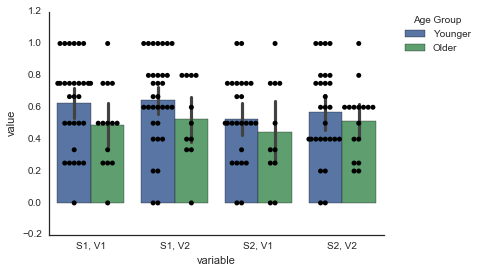

In [48]:
my_table = %R wordseg.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1, 2, 3], ['S1, V1', 'S1, V2', 'S2, V1', 'S2, V2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

#### Average percent correct, part_words

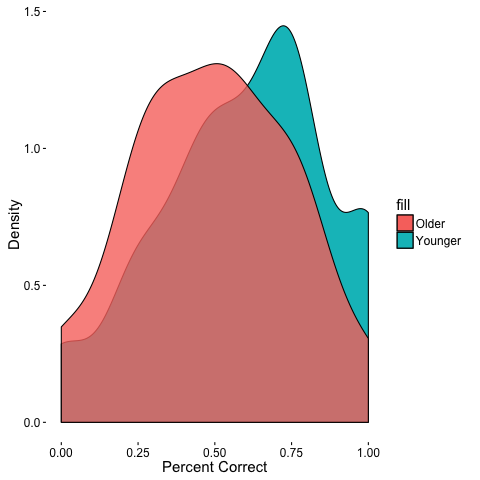

In [49]:
%%R 

#histrogram
ggplot(wordseg.m, (aes(x=value))) +
#   geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1") +
#   geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8) +
  geom_density(data=subset(wordseg.m, age_group == 1), aes(fill="Younger")) +
  geom_density(data=subset(wordseg.m, age_group == 2), alpha =.8, aes(fill="Older")) +
  scale_colour_manual(name="GROUPS",values=cols) +
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic() +
  theme(text = element_text(size = 15)) +
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Graph by session 1 and 2, part_words

In [50]:
# prepare word seg data
%R sess_pw.m <- melt(summary,id.vars='age_group', measure.vars=c('part_w_s_1_v_all','part_w_s_2_v_all'))
%R head(sess_pw.m)

,age_group,variable,value
1,1,part_w_s_1_v_all,0.25
2,1,part_w_s_1_v_all,0.50
3,1,part_w_s_1_v_all,0.60
4,1,part_w_s_1_v_all,0.60
5,1,part_w_s_1_v_all,0.60
6,1,part_w_s_1_v_all,1.00


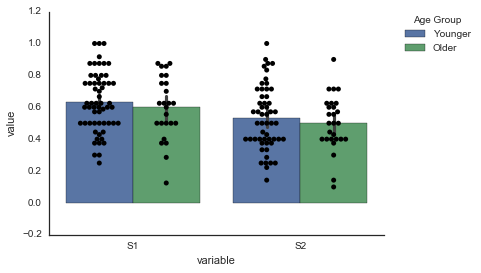

In [51]:
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

#### Learning scores by session, version and age, part_words

In [52]:
%%R
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 3.0928, df = 167, p-value = 0.002325
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5238228 0.6079232
sample estimates:
mean of x 
 0.565873 



In [53]:
%%R
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$part_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$part_w_s_1_v_all
t = 3.2027, df = 83, p-value = 0.001931
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5359050 0.6535791
sample estimates:
mean of x 
0.5947421 



In [54]:
%%R
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$part_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$part_w_s_2_v_all
t = 0.92555, df = 79, p-value = 0.3575
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4676402 0.5886098
sample estimates:
mean of x 
 0.528125 



In [55]:
%%R
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$part_w_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$part_w_s_all_v_1
t = 1.4859, df = 79, p-value = 0.1413
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4840835 0.6096665
sample estimates:
mean of x 
 0.546875 



In [56]:
%%R
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$part_w_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$part_w_s_all_v_2
t = 2.6876, df = 85, p-value = 0.008657
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5205580 0.6374523
sample estimates:
mean of x 
0.5790052 



In [57]:
%%R
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$part_w_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$part_w_s_1_v_1
t = 1.9854, df = 43, p-value = 0.05351
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4986850 0.6679817
sample estimates:
mean of x 
0.5833333 



In [58]:
%%R
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$part_w_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$part_w_s_1_v_2
t = 2.7959, df = 43, p-value = 0.007707
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5326197 0.7014712
sample estimates:
mean of x 
0.6170455 



In [59]:
%%R
#one sample t-test session 1, younger (both versions)
t.test(younger$part_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$part_w_s_1_v_all
t = 3.7973, df = 58, p-value = 0.0003523
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5629807 0.7034034
sample estimates:
mean of x 
0.6331921 



In [60]:
%%R
#one sample t-test session 1, older (both versions)
t.test(older$part_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$part_w_s_1_v_all
t = 0.07751, df = 24, p-value = 0.9389
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.3974896 0.6105104
sample estimates:
mean of x 
    0.504 



In [61]:
%%R
#one sample t-test session 2, younger (both versions)
t.test(younger$part_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$part_w_s_2_v_all
t = 1.3182, df = 52, p-value = 0.1932
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4740524 0.6253187
sample estimates:
mean of x 
0.5496855 



In [62]:
%%R
#one sample t-test session 2, older (both versions)
t.test(older$part_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$part_w_s_2_v_all
t = -0.27674, df = 26, p-value = 0.7842
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.3803490 0.5912559
sample estimates:
mean of x 
0.4858025 



### order_TP33 Percent Correct

In [63]:
# prepare TP33 data 
%R wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('order_TP33_s_1_v_1','order_TP33_s_1_v_2','order_TP33_s_2_v_1','order_TP33_s_2_v_2'))
%R head(wordseg.m)

,age_group,variable,value
1,1,order_TP33_s_1_v_1,0.666667
2,1,order_TP33_s_1_v_1,NaN
3,1,order_TP33_s_1_v_1,NaN
4,1,order_TP33_s_1_v_1,NaN
5,1,order_TP33_s_1_v_1,NaN
6,1,order_TP33_s_1_v_1,0.333333


#### Accuracy by Sess and Vers, order_TP33

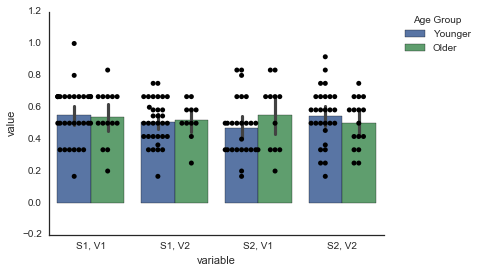

In [64]:

my_table = %R wordseg.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1, 2, 3], ['S1, V1', 'S1, V2', 'S2, V1', 'S2, V2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

#### Average percent correct, order_TP33

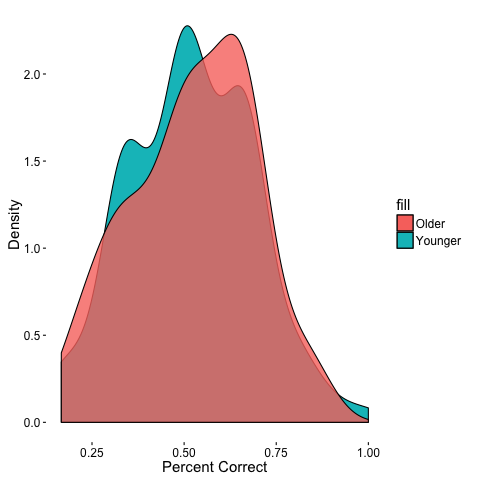

In [65]:
%%R 

#histrogram
ggplot(wordseg.m, (aes(x=value))) +
#   geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1") +
#   geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8) +
  geom_density(data=subset(wordseg.m, age_group == 1), aes(fill="Younger")) +
  geom_density(data=subset(wordseg.m, age_group == 2), alpha =.8, aes(fill="Older")) +
  scale_colour_manual(name="GROUPS",values=cols) +
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic() +
  theme(text = element_text(size = 15)) +
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Graph by session 1 and 2, order_TP33

In [66]:
%R sess_ws.m <- melt(summary,id.vars='age_group', measure.vars=c('order_TP33_s_1_v_all','order_TP33_s_2_v_all'))
%R head(sess_ws.m)

,age_group,variable,value
1,1,order_TP33_s_1_v_all,0.666667
2,1,order_TP33_s_1_v_all,0.666667
3,1,order_TP33_s_1_v_all,0.416667
4,1,order_TP33_s_1_v_all,0.416667
5,1,order_TP33_s_1_v_all,0.416667
6,1,order_TP33_s_1_v_all,0.333333


#### Accuracy by Session, order_TP33

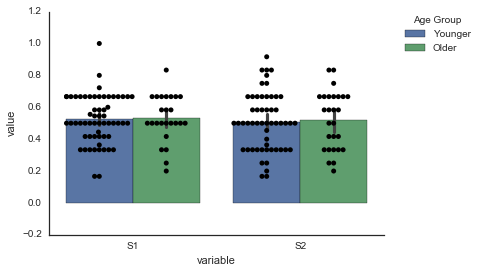

In [67]:
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

#### Learning scores by session, version and age, order_TP33

In [68]:
%%R
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 1.662, df = 168, p-value = 0.09837
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4959974 0.5466241
sample estimates:
mean of x 
0.5213107 



In [69]:
%%R
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$order_TP33_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_1_v_all
t = 1.6931, df = 83, p-value = 0.09419
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4951683 0.5601227
sample estimates:
mean of x 
0.5276455 



In [70]:
%%R
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$order_TP33_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_2_v_all
t = 0.61391, df = 80, p-value = 0.541
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4722834 0.5524453
sample estimates:
mean of x 
0.5123644 



In [71]:
%%R
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$order_TP33_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_all_v_1
t = 1.0742, df = 80, p-value = 0.286
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4814039 0.5622175
sample estimates:
mean of x 
0.5218107 



In [72]:
%%R
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$order_TP33_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_all_v_2
t = 1.2381, df = 85, p-value = 0.2191
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4876594 0.5530736
sample estimates:
mean of x 
0.5203665 



In [73]:
%%R
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$order_TP33_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_1_v_1
t = 1.7644, df = 43, p-value = 0.08478
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4934990 0.5974101
sample estimates:
mean of x 
0.5454545 



In [74]:
%%R
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$order_TP33_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$order_TP33_s_1_v_2
t = 0.68544, df = 43, p-value = 0.4967
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4735154 0.5537574
sample estimates:
mean of x 
0.5136364 



In [75]:
%%R
#one sample t-test session 1, younger (both versions)
t.test(younger$order_TP33_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$order_TP33_s_1_v_all
t = 1.3173, df = 58, p-value = 0.1929
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4864483 0.5657174
sample estimates:
mean of x 
0.5260829 



In [76]:
%%R
#one sample t-test session 1, older (both versions)
t.test(older$order_TP33_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$order_TP33_s_1_v_all
t = 1.0676, df = 24, p-value = 0.2963
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4707584 0.5919082
sample estimates:
mean of x 
0.5313333 



In [77]:
%%R
#one sample t-test session 2, younger (both versions)
t.test(younger$order_TP33_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$order_TP33_s_2_v_all
t = 0.3501, df = 53, p-value = 0.7277
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4589987 0.5583414
sample estimates:
mean of x 
  0.50867 



In [78]:
%%R
#one sample t-test session 2, older (both versions)
t.test(older$order_TP33_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$order_TP33_s_2_v_all
t = 0.56074, df = 26, p-value = 0.5798
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4473433 0.5921628
sample estimates:
mean of x 
0.5197531 



### three_1nov_1cong Percent Correct

In [79]:
%%R
# prepare 3 1-nov,1-cong data 
wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('three_1nov_1cong_s_1_v_1','three_1nov_1cong_s_1_v_2',
                                                              'three_1nov_1cong_s_2_v_1','three_1nov_1cong_s_2_v_2'))


In [80]:
%R head(wordseg.m)

,age_group,variable,value
1,1,three_1nov_1cong_s_1_v_1,0.333333
2,1,three_1nov_1cong_s_1_v_1,NaN
3,1,three_1nov_1cong_s_1_v_1,NaN
4,1,three_1nov_1cong_s_1_v_1,NaN
5,1,three_1nov_1cong_s_1_v_1,NaN
6,1,three_1nov_1cong_s_1_v_1,0.666667


#### Accuracy by Sess and Vers, three_1nov_1cong

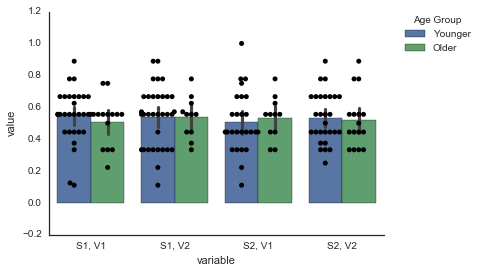

In [81]:
my_table = %R wordseg.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1, 2, 3], ['S1, V1', 'S1, V2', 'S2, V1', 'S2, V2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

#### Average percent correct, three_1nov_1cong

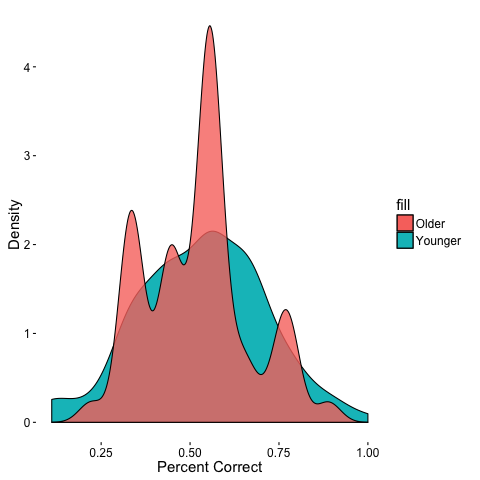

In [82]:
%%R 

#histrogram
ggplot(wordseg.m, (aes(x=value))) +
#   geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1") +
#   geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8) +
  geom_density(data=subset(wordseg.m, age_group == 1), aes(fill="Younger")) +
  geom_density(data=subset(wordseg.m, age_group == 2), alpha =.8, aes(fill="Older")) +
  scale_colour_manual(name="GROUPS",values=cols) +
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic() +
  theme(text = element_text(size = 15)) +
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Graph by Session 1 and 2, three_1nov_1cong

In [83]:
%R sess_ws.m <- melt(summary,id.vars='age_group', measure.vars=c('three_1nov_1cong_s_1_v_all','three_1nov_1cong_s_2_v_all'))
%R head(sess_ws.m)

,age_group,variable,value
1,1,three_1nov_1cong_s_1_v_all,0.333333
2,1,three_1nov_1cong_s_1_v_all,0.555556
3,1,three_1nov_1cong_s_1_v_all,0.333333
4,1,three_1nov_1cong_s_1_v_all,0.333333
5,1,three_1nov_1cong_s_1_v_all,0.333333
6,1,three_1nov_1cong_s_1_v_all,0.666667


#### Accuracy by Session, three_1nov_1cong

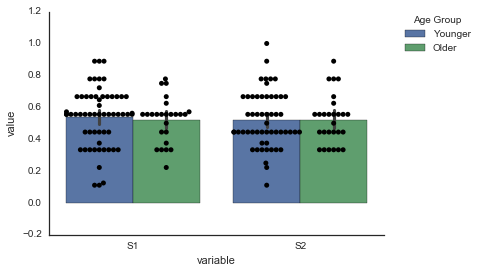

In [84]:
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

#### Learning scores by session, version and age, three_1nov_1cong

In [85]:
%%R
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 2.3136, df = 168, p-value = 0.0219
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5043814 0.5553537
sample estimates:
mean of x 
0.5298676 



In [86]:
%%R
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$three_1nov_1cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_1_v_all
t = 1.753, df = 83, p-value = 0.08329
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4956081 0.5696610
sample estimates:
mean of x 
0.5326346 



In [87]:
%%R
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$three_1nov_1cong_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_2_v_all
t = 1.1717, df = 80, p-value = 0.2448
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4847895 0.5587634
sample estimates:
mean of x 
0.5217764 



In [88]:
%%R
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$three_1nov_1cong_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_all_v_1
t = 1.3914, df = 80, p-value = 0.168
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4887858 0.5633404
sample estimates:
mean of x 
0.5260631 



In [89]:
%%R
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$three_1nov_1cong_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_all_v_2
t = 2.0735, df = 85, p-value = 0.04115
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5015235 0.5725623
sample estimates:
mean of x 
0.5370429 



In [90]:
%%R
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$three_1nov_1cong_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_1_v_1
t = 1.4479, df = 43, p-value = 0.1549
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4859863 0.5853521
sample estimates:
mean of x 
0.5356692 



In [91]:
%%R
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$three_1nov_1cong_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$three_1nov_1cong_s_1_v_2
t = 1.4669, df = 43, p-value = 0.1497
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4853972 0.5925249
sample estimates:
mean of x 
 0.538961 



In [92]:
%%R
#one sample t-test session 1, younger (both versions)
t.test(younger$three_1nov_1cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$three_1nov_1cong_s_1_v_all
t = 1.5882, df = 58, p-value = 0.1177
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4901798 0.5852585
sample estimates:
mean of x 
0.5377192 



In [93]:
%%R
#one sample t-test session 1, older (both versions)
t.test(older$three_1nov_1cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$three_1nov_1cong_s_1_v_all
t = 0.72883, df = 24, p-value = 0.4732
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4622011 0.5790688
sample estimates:
mean of x 
0.5206349 



In [94]:
%%R
#one sample t-test session 2, younger (both versions)
t.test(younger$three_1nov_1cong_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$three_1nov_1cong_s_2_v_all
t = 0.88735, df = 53, p-value = 0.3789
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4734179 0.5687632
sample estimates:
mean of x 
0.5210905 



In [95]:
%%R
#one sample t-test session 2, older (both versions)
t.test(older$three_1nov_1cong_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$three_1nov_1cong_s_2_v_all
t = 0.77796, df = 26, p-value = 0.4436
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4619856 0.5843107
sample estimates:
mean of x 
0.5231481 



### three_2nov_1cong_1incong Percent Correct

In [96]:
%%R
# prepare 3 2-nov,1-cog,1-incog data 
wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('three_2nov_1cong_1incong_s_1_v_1',
                                                              'three_2nov_1cong_1incong_s_1_v_2',
                                                              'three_2nov_1cong_1incong_s_2_v_1',
                                                              'three_2nov_1cong_1incong_s_2_v_2'))

In [97]:
%R head(wordseg.m)

,age_group,variable,value
1,1,three_2nov_1cong_1incong_s_1_v_1,0.6
2,1,three_2nov_1cong_1incong_s_1_v_1,NaN
3,1,three_2nov_1cong_1incong_s_1_v_1,NaN
4,1,three_2nov_1cong_1incong_s_1_v_1,NaN
5,1,three_2nov_1cong_1incong_s_1_v_1,NaN
6,1,three_2nov_1cong_1incong_s_1_v_1,0.5


#### Accuracy by Session and Version, three_2nov_1cong_1incong

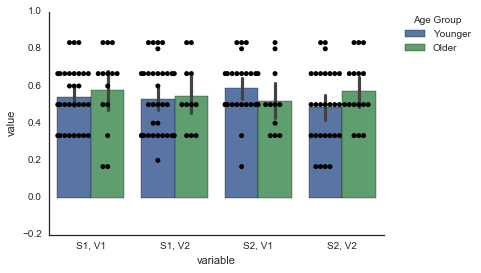

In [98]:
my_table = %R wordseg.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1, 2, 3], ['S1, V1', 'S1, V2', 'S2, V1', 'S2, V2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

#### Average Percent Correct, three_2nov_1cong_1incong

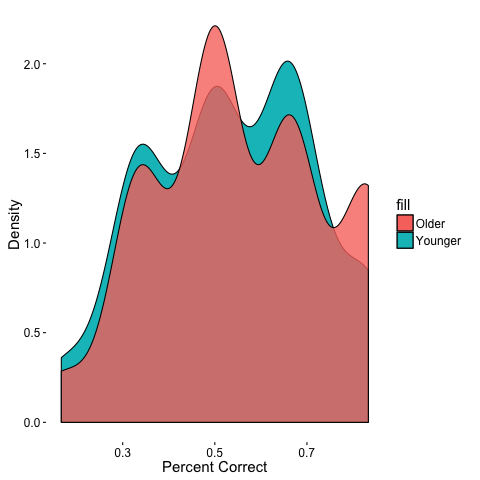

In [99]:
%%R 

#histrogram
ggplot(wordseg.m, (aes(x=value))) +
#   geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1") +
#   geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8) +
  geom_density(data=subset(wordseg.m, age_group == 1), aes(fill="Younger")) +
  geom_density(data=subset(wordseg.m, age_group == 2), alpha =.8, aes(fill="Older")) +
  scale_colour_manual(name="GROUPS",values=cols) +
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic() +
  theme(text = element_text(size = 15)) +
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Graph by session 1 and 2, three_2nov_1cong_1incong

In [100]:
%%R
sess_ws.m <- melt(summary,id.vars='age_group', measure.vars=c('three_2nov_1cong_1incong_s_1_v_all',
                                                              'three_2nov_1cong_1incong_s_2_v_all'))

In [101]:
%R head(sess_ws.m)

,age_group,variable,value
1,1,three_2nov_1cong_1incong_s_1_v_all,0.600000
2,1,three_2nov_1cong_1incong_s_1_v_all,0.500000
3,1,three_2nov_1cong_1incong_s_1_v_all,0.833333
4,1,three_2nov_1cong_1incong_s_1_v_all,0.833333
5,1,three_2nov_1cong_1incong_s_1_v_all,0.666667
6,1,three_2nov_1cong_1incong_s_1_v_all,0.500000


#### Accuracy by session, three_2nov_1cong_1incong

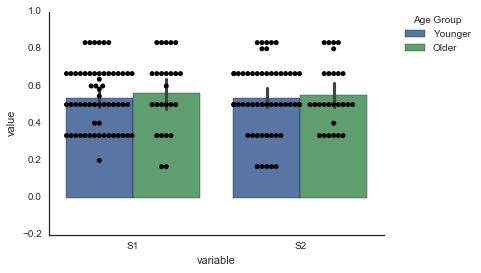

In [102]:
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

#### Learning scores by session, version and age, three_2nov_1cong_1incong

In [103]:
%%R
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 3.0675, df = 168, p-value = 0.002517
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5153251 0.5706709
sample estimates:
mean of x 
 0.542998 



In [104]:
%%R
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$three_2nov_1cong_1incong_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_1_v_all
t = 2.259, df = 83, p-value = 0.0265
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5052161 0.5820494
sample estimates:
mean of x 
0.5436328 



In [105]:
%%R
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$three_2nov_1cong_1incong_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_2_v_all
t = 2.0058, df = 80, p-value = 0.04826
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5003198 0.5811616
sample estimates:
mean of x 
0.5407407 



In [106]:
%%R
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$three_2nov_1cong_1incong_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_all_v_1
t = 3.1578, df = 80, p-value = 0.002242
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5223708 0.5986169
sample estimates:
mean of x 
0.5604938 



In [107]:
%%R
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$three_2nov_1cong_1incong_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_all_v_2
t = 1.4304, df = 85, p-value = 0.1563
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4885102 0.5704045
sample estimates:
mean of x 
0.5294574 



In [108]:
%%R
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$three_2nov_1cong_1incong_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_1_v_1
t = 1.9987, df = 43, p-value = 0.05199
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4995092 0.6095817
sample estimates:
mean of x 
0.5545455 



In [109]:
%%R
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$three_2nov_1cong_1incong_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$three_2nov_1cong_1incong_s_1_v_2
t = 1.2698, df = 43, p-value = 0.211
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4790584 0.5921538
sample estimates:
mean of x 
0.5356061 



In [110]:
%%R
#one sample t-test session 1, younger (both versions)
t.test(younger$three_2nov_1cong_1incong_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$three_2nov_1cong_1incong_s_1_v_all
t = 1.6211, df = 58, p-value = 0.1104
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4917824 0.5782228
sample estimates:
mean of x 
0.5350026 



In [111]:
%%R
#one sample t-test session 1, older (both versions)
t.test(older$three_2nov_1cong_1incong_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$three_2nov_1cong_1incong_s_1_v_all
t = 1.5748, df = 24, p-value = 0.1284
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4801245 0.6478755
sample estimates:
mean of x 
    0.564 



In [112]:
%%R
#one sample t-test session 2, younger (both versions)
t.test(younger$three_2nov_1cong_1incong_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$three_2nov_1cong_1incong_s_2_v_all
t = 1.3937, df = 53, p-value = 0.1692
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4842788 0.5873261
sample estimates:
mean of x 
0.5358025 



In [113]:
%%R
#one sample t-test session 2, older (both versions)
t.test(older$three_2nov_1cong_1incong_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$three_2nov_1cong_1incong_s_2_v_all
t = 1.5177, df = 26, p-value = 0.1412
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4820635 0.6191711
sample estimates:
mean of x 
0.5506173 



### three_2nov_2cong Percent Correct

In [114]:
%%R
# prepare 3 2-nov,2-cog data 
wordseg.m <- melt(summary,id.vars='age_group', measure.vars=c('three_2nov_2cong_s_1_v_1', 'three_2nov_2cong_s_1_v_2',
                                                              'three_2nov_2cong_s_2_v_1', 'three_2nov_2cong_s_2_v_2'))

In [115]:
%R head(wordseg.m)

,age_group,variable,value
1,1,three_2nov_2cong_s_1_v_1,0.5
2,1,three_2nov_2cong_s_1_v_1,NaN
3,1,three_2nov_2cong_s_1_v_1,NaN
4,1,three_2nov_2cong_s_1_v_1,NaN
5,1,three_2nov_2cong_s_1_v_1,NaN
6,1,three_2nov_2cong_s_1_v_1,0.5


#### Accuracy by Session and Version, three_2nov_2cong

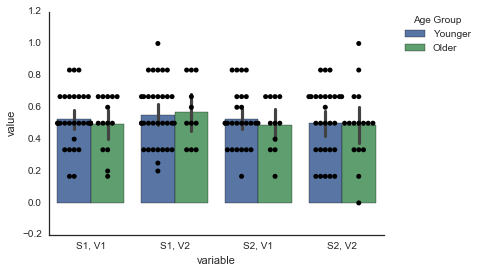

In [116]:
my_table = %R wordseg.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1, 2, 3], ['S1, V1', 'S1, V2', 'S2, V1', 'S2, V2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

#### Average percent correct, three_2nov_2cong

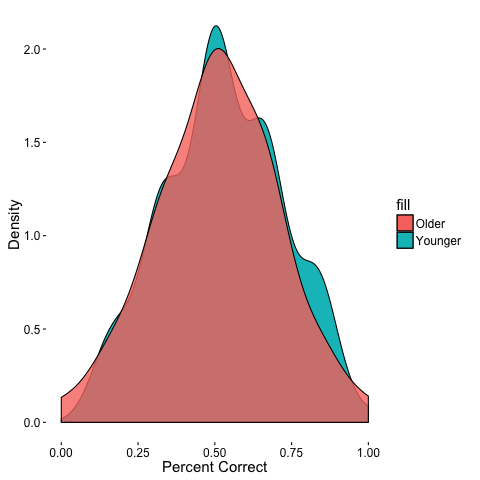

In [117]:
%%R 

#histrogram
ggplot(wordseg.m, (aes(x=value))) +
#   geom_density(data=subset(wordseg.m, age_group == 1),color="black", fill = "gray1") +
#   geom_density(data=subset(wordseg.m, age_group == 2),color="black", fill = "gray80", alpha = .8) +
  geom_density(data=subset(wordseg.m, age_group == 1), aes(fill="Younger")) +
  geom_density(data=subset(wordseg.m, age_group == 2), alpha =.8, aes(fill="Older")) +
  scale_colour_manual(name="GROUPS",values=cols) +
  scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic() +
  theme(text = element_text(size = 15)) +
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Graph by session 1 and 2, three_2nov_2cong

In [118]:
%%R
sess_ws.m <- melt(summary,id.vars='age_group', measure.vars=c('three_2nov_2cong_s_1_v_all',
                                                              'three_2nov_2cong_s_2_v_all'))

In [119]:
%R head(sess_ws.m)

,age_group,variable,value
1,1,three_2nov_2cong_s_1_v_all,0.500000
2,1,three_2nov_2cong_s_1_v_all,0.833333
3,1,three_2nov_2cong_s_1_v_all,0.666667
4,1,three_2nov_2cong_s_1_v_all,0.666667
5,1,three_2nov_2cong_s_1_v_all,0.833333
6,1,three_2nov_2cong_s_1_v_all,0.500000


#### Accuracy by Session, three_2nov_2cong

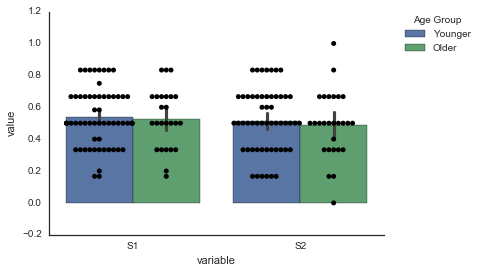

In [120]:
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="age_group")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="age_group", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[2:4], ['Younger', 'Older'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Age Group')

### Learning scores by session, version and age

In [121]:
%%R
#one sample t-test (regarless of version, age, session), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 1.5048, df = 168, p-value = 0.1342
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4930178 0.5517554
sample estimates:
mean of x 
0.5223866 



In [122]:
%%R
#one sample t-test session 1 all (both versions, both ages), 50% chance 
t.test(summary$three_2nov_2cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_1_v_all
t = 1.7987, df = 83, p-value = 0.0757
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4962433 0.5747884
sample estimates:
mean of x 
0.5355159 



In [123]:
%%R
#one sample t-test session 2 all (both versions, both ages), 50% chance 
t.test(summary$three_2nov_2cong_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_2_v_all
t = 0.29362, df = 80, p-value = 0.7698
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4619569 0.5512118
sample estimates:
mean of x 
0.5065844 



In [124]:
%%R
#one sample t-test version 1 (both session, both ages), 50% chance
t.test(summary$three_2nov_2cong_s_all_v_1, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_all_v_1
t = 0.83937, df = 80, p-value = 0.4038
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4779977 0.5541011
sample estimates:
mean of x 
0.5160494 



In [125]:
%%R
#one sample t-test version 2 (both session, both ages), 50% chance
t.test(summary$three_2nov_2cong_s_all_v_2, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_all_v_2
t = 1.2559, df = 85, p-value = 0.2126
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4831595 0.5745925
sample estimates:
mean of x 
 0.528876 



In [126]:
%%R
#one sample t-test version 1, session 1 (both ages), 50% chance
t.test(summary$three_2nov_2cong_s_1_v_1, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_1_v_1
t = 0.61513, df = 43, p-value = 0.5417
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4637518 0.5680664
sample estimates:
mean of x 
0.5159091 



In [127]:
%%R
#one sample t-test version 2, session 1 (both ages), 50% chance
t.test(summary$three_2nov_2cong_s_1_v_2, mu=.5)


	One Sample t-test

data:  summary$three_2nov_2cong_s_1_v_2
t = 1.9441, df = 43, p-value = 0.05845
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4978355 0.6180736
sample estimates:
mean of x 
0.5579545 



In [128]:
%%R
#one sample t-test session 1, younger (both versions)
t.test(younger$three_2nov_2cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  younger$three_2nov_2cong_s_1_v_all
t = 1.6277, df = 58, p-value = 0.109
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4912378 0.5850334
sample estimates:
mean of x 
0.5381356 



In [129]:
%%R
#one sample t-test session 1, older (both versions)
t.test(older$three_2nov_2cong_s_1_v_all, mu=.5)


	One Sample t-test

data:  older$three_2nov_2cong_s_1_v_all
t = 0.78467, df = 24, p-value = 0.4403
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4521788 0.6064879
sample estimates:
mean of x 
0.5293333 



In [130]:
%%R
#one sample t-test session 2 all (both versions, younger), 50% chance 
t.test(younger$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  younger$non_w_s_2_v_all
t = 1.156, df = 53, p-value = 0.2529
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4769121 0.5859039
sample estimates:
mean of x 
 0.531408 



In [131]:
%%R
#one sample t-test session 2 all (both versions, older), 50% chance 
t.test(older$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  older$non_w_s_2_v_all
t = -0.0096553, df = 26, p-value = 0.9924
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4308406 0.5685127
sample estimates:
mean of x 
0.4996767 



## CONDITION AND SESSION

In [132]:
%%R
#summary for 50Nap
cond_50nap <- subset(summary, condition=='50Nap')

#summary for 90Nap
cond_90nap <- subset(summary, condition=='90Nap')

#summary for AW
cond_aw <- subset(summary, condition=='AW')

#summary for pilot
cond_pilot <- subset(summary, condition=='pilot')

#summary for QW
cond_qw <- subset(summary, condition=='QW')

In [133]:
%R head(cond_50nap)

,participant,age_group,condition,non_w_s_2_v_1,order_TP33_s_2_v_1,part_w_s_2_v_1,three_1nov_1cong_s_2_v_1,three_2nov_1cong_1incong_s_2_v_1,three_2nov_2cong_s_2_v_1,grand_total_s_2_v_1,non_w_s_all_v_1,order_TP33_s_all_v_1,part_w_s_all_v_1,three_1nov_1cong_s_all_v_1,three_2nov_1cong_1incong_s_all_v_1,three_2nov_2cong_s_all_v_1,grand_total_s_all_v_1,non_w_s_all_v_2,order_TP33_s_all_v_2,part_w_s_all_v_2,three_1nov_1cong_s_all_v_2,three_2nov_1cong_1incong_s_all_v_2,three_2nov_2cong_s_all_v_2,grand_total_s_all_v_2,non_w_s_1_v_2,order_TP33_s_1_v_2,part_w_s_1_v_2,three_1nov_1cong_s_1_v_2,three_2nov_1cong_1incong_s_1_v_2,three_2nov_2cong_s_1_v_2,grand_total_s_1_v_2,non_w_s_1_v_all,order_TP33_s_1_v_all,part_w_s_1_v_all,three_1nov_1cong_s_1_v_all,three_2nov_1cong_1incong_s_1_v_all,three_2nov_2cong_s_1_v_all,grand_total_s_1_v_all,non_w_s_2_v_2,order_TP33_s_2_v_2,part_w_s_2_v_2,three_1nov_1cong_s_2_v_2,three_2nov_1cong_1incong_s_2_v_2,three_2nov_2cong_s_2_v_2,grand_total_s_2_v_2,non_w_all_type,order_TP33_all_type,part_w_all_type,three_1nov_1cong_all_type,three_2nov_1cong_1incong_all_type,three_2nov_2cong_all_type,grand_total_all_type,non_w_s_2_v_all,order_TP33_s_2_v_all,part_w_s_2_v_all,three_1nov_1cong_s_2_v_all,three_2nov_1cong_1incong_s_2_v_all,three_2nov_2cong_s_2_v_all,grand_total_s_2_v_all,non_w_s_1_v_1,order_TP33_s_1_v_1,part_w_s_1_v_1,three_1nov_1cong_s_1_v_1,three_2nov_1cong_1incong_s_1_v_1,three_2nov_2cong_s_1_v_1,grand_total_s_1_v_1
24,133,1,50Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714286,0.583333,0.75,0.235294,0.416667,0.583333,0.528736,0.714286,0.666667,0.75,0.111111,0.333333,0.666667,0.522727,0.714286,0.666667,0.750000,0.111111,0.333333,0.666667,0.522727,0.714286,0.500000,0.75,0.375000,0.500000,0.500000,0.534884,0.714286,0.583333,0.750000,0.235294,0.416667,0.583333,0.528736,0.714286,0.500000,0.75,0.375000,0.500000,0.500000,0.534884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,138,1,50Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,0.500000,0.500000,0.555556,0.500000,0.833333,0.589744,0.600000,0.166667,0.00,0.333333,0.333333,0.833333,0.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,0.500000,0.500000,0.555556,0.500000,0.833333,0.589744,0.600000,0.166667,0.00,0.333333,0.333333,0.833333,0.375000,0.611111,0.277778,0.222222,0.444444,0.416667,0.833333,0.471264,0.600000,0.166667,0.00,0.333333,0.333333,0.833333,0.375000,0.625000,0.500000,0.500000,0.555556,0.500000,0.833333,0.589744
27,204,1,50Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429,0.666667,0.666667,0.444444,0.500000,0.500000,0.540541,0.222222,0.583333,0.40,0.666667,0.166667,0.600000,0.456522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429,0.666667,0.666667,0.444444,0.500000,0.500000,0.540541,0.222222,0.583333,0.40,0.666667,0.166667,0.600000,0.456522,0.375000,0.611111,0.500000,0.555556,0.333333,0.545455,0.493976,0.222222,0.583333,0.40,0.666667,0.166667,0.600000,0.456522,0.571429,0.666667,0.666667,0.444444,0.500000,0.500000,0.540541
37,316,2,50Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,0.200000,0.333333,0.555556,0.166667,0.666667,0.459459,0.555556,0.666667,0.60,0.777778,0.500000,0.333333,0.595745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,0.200000,0.333333,0.555556,0.166667,0.666667,0.459459,0.555556,0.666667,0.60,0.777778,0.500000,0.333333,0.595745,0.588235,0.529412,0.500000,0.666667,0.333333,0.500000,0.535714,0.555556,0.666667,0.60,0.777778,0.500000,0.333333,0.595745,0.625000,0.200000,0.333333,0.555556,0.166667,0.666667,0.459459
38,317,2,50Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.583333,0.25,0.777778,0.500000,0.500000,0.531915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400000,0.583333,0.25,0.777778,0.500000,0.500000,0.531915,0.400000,0.583333,0.250000,0.777778,0.500000,0.500000,0.531915,0.400000,0.583333,0.25,0.777778,0.500000,0.500000,0.531915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,323,2,50Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,0.500000,0.000000,0.222222,0.500000,0.500000,0.410256,0.500000,0.666667,0.40,0.444444,0.500000,0.500000,0.520833,NaN,NaN,NaN,NaN,NaN,NaN,

In [134]:
%R head(cond_90nap)

,participant,age_group,condition,non_w_s_2_v_1,order_TP33_s_2_v_1,part_w_s_2_v_1,three_1nov_1cong_s_2_v_1,three_2nov_1cong_1incong_s_2_v_1,three_2nov_2cong_s_2_v_1,grand_total_s_2_v_1,non_w_s_all_v_1,order_TP33_s_all_v_1,part_w_s_all_v_1,three_1nov_1cong_s_all_v_1,three_2nov_1cong_1incong_s_all_v_1,three_2nov_2cong_s_all_v_1,grand_total_s_all_v_1,non_w_s_all_v_2,order_TP33_s_all_v_2,part_w_s_all_v_2,three_1nov_1cong_s_all_v_2,three_2nov_1cong_1incong_s_all_v_2,three_2nov_2cong_s_all_v_2,grand_total_s_all_v_2,non_w_s_1_v_2,order_TP33_s_1_v_2,part_w_s_1_v_2,three_1nov_1cong_s_1_v_2,three_2nov_1cong_1incong_s_1_v_2,three_2nov_2cong_s_1_v_2,grand_total_s_1_v_2,non_w_s_1_v_all,order_TP33_s_1_v_all,part_w_s_1_v_all,three_1nov_1cong_s_1_v_all,three_2nov_1cong_1incong_s_1_v_all,three_2nov_2cong_s_1_v_all,grand_total_s_1_v_all,non_w_s_2_v_2,order_TP33_s_2_v_2,part_w_s_2_v_2,three_1nov_1cong_s_2_v_2,three_2nov_1cong_1incong_s_2_v_2,three_2nov_2cong_s_2_v_2,grand_total_s_2_v_2,non_w_all_type,order_TP33_all_type,part_w_all_type,three_1nov_1cong_all_type,three_2nov_1cong_1incong_all_type,three_2nov_2cong_all_type,grand_total_all_type,non_w_s_2_v_all,order_TP33_s_2_v_all,part_w_s_2_v_all,three_1nov_1cong_s_2_v_all,three_2nov_1cong_1incong_s_2_v_all,three_2nov_2cong_s_2_v_all,grand_total_s_2_v_all,non_w_s_1_v_1,order_TP33_s_1_v_1,part_w_s_1_v_1,three_1nov_1cong_s_1_v_1,three_2nov_1cong_1incong_s_1_v_1,three_2nov_2cong_s_1_v_1,grand_total_s_1_v_1
20,126,1,90Nap,0.875,0.333333,0.5,0.333333,0.166667,0.6,0.473684,0.875000,0.333333,0.50,0.333333,0.166667,0.600000,0.473684,1.000,0.545455,1.0,0.666667,0.666667,0.333333,0.695652,1.0,0.545455,1.0,0.666667,0.666667,0.333333,0.695652,1.000000,0.545455,1.00,0.666667,0.666667,0.333333,0.695652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944444,0.470588,0.750000,0.500000,0.416667,0.454545,0.595238,0.875,0.333333,0.5,0.333333,0.166667,0.600000,0.473684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,129,1,90Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.333333,0.25,0.666667,0.833333,0.833333,0.589744,0.500,0.250000,0.8,0.444444,0.833333,0.666667,0.520833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.333333,0.25,0.666667,0.833333,0.833333,0.589744,0.500,0.250000,0.8,0.444444,0.833333,0.666667,0.520833,0.500000,0.277778,0.555556,0.555556,0.833333,0.750000,0.551724,0.500,0.250000,0.8,0.444444,0.833333,0.666667,0.520833,0.500000,0.333333,0.25,0.666667,0.833333,0.833333,0.589744
23,132,1,90Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,0.500000,0.25,0.666667,0.666667,0.666667,0.589744,0.400,0.666667,0.4,0.666667,0.800000,0.166667,0.531915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,0.500000,0.25,0.666667,0.666667,0.666667,0.589744,0.400,0.666667,0.4,0.666667,0.800000,0.166667,0.531915,0.500000,0.611111,0.333333,0.666667,0.727273,0.416667,0.558140,0.400,0.666667,0.4,0.666667,0.800000,0.166667,0.531915,0.625000,0.500000,0.25,0.666667,0.666667,0.666667,0.589744
28,305,2,90Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,0.500000,0.50,0.500000,0.600000,0.333333,0.513514,0.400,0.583333,0.6,0.555556,0.833333,0.166667,0.520833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000,0.500000,0.50,0.500000,0.600000,0.333333,0.513514,0.400,0.583333,0.6,0.555556,0.833333,0.166667,0.520833,0.500000,0.555556,0.555556,0.529412,0.727273,0.250000,0.517647,0.400,0.583333,0.6,0.555556,0.833333,0.166667,0.520833,0.625000,0.500000,0.50,0.500000,0.600000,0.333333,0.513514
39,319,2,90Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375000,0.666667,0.75,0.555556,0.166667,0.333333,0.461538,0.600,0.416667,1.0,0.333333,0.333333,0.333333,0.479167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375000,0.666667,0.75,0.555556,0.166667,0.333333,0.461538,0.600,0.416667,1.0,0.333333,0.333333,0.333333,0.479167,0.500000,0.500000,0.888889,0.444444,0.250000,0.333333,0.471264,0.600,0.416667,1.0,0.333333,0.333333,0.333333,0.479167,0.375000,0.666667,0.75,0.555556,0.166667,0.333333,0.461538
48,343,2,90Nap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.857143,0.666667,0.75,0.555556,0.833333,0.666667,0.710526,0.375,0.750000,0.6,0.888889,0.333333,0.833333,0.652174,NaN,NaN,NaN,NaN,NaN

In [135]:
%R head(cond_aw)

,participant,age_group,condition,non_w_s_2_v_1,order_TP33_s_2_v_1,part_w_s_2_v_1,three_1nov_1cong_s_2_v_1,three_2nov_1cong_1incong_s_2_v_1,three_2nov_2cong_s_2_v_1,grand_total_s_2_v_1,non_w_s_all_v_1,order_TP33_s_all_v_1,part_w_s_all_v_1,three_1nov_1cong_s_all_v_1,three_2nov_1cong_1incong_s_all_v_1,three_2nov_2cong_s_all_v_1,grand_total_s_all_v_1,non_w_s_all_v_2,order_TP33_s_all_v_2,part_w_s_all_v_2,three_1nov_1cong_s_all_v_2,three_2nov_1cong_1incong_s_all_v_2,three_2nov_2cong_s_all_v_2,grand_total_s_all_v_2,non_w_s_1_v_2,order_TP33_s_1_v_2,part_w_s_1_v_2,three_1nov_1cong_s_1_v_2,three_2nov_1cong_1incong_s_1_v_2,three_2nov_2cong_s_1_v_2,grand_total_s_1_v_2,non_w_s_1_v_all,order_TP33_s_1_v_all,part_w_s_1_v_all,three_1nov_1cong_s_1_v_all,three_2nov_1cong_1incong_s_1_v_all,three_2nov_2cong_s_1_v_all,grand_total_s_1_v_all,non_w_s_2_v_2,order_TP33_s_2_v_2,part_w_s_2_v_2,three_1nov_1cong_s_2_v_2,three_2nov_1cong_1incong_s_2_v_2,three_2nov_2cong_s_2_v_2,grand_total_s_2_v_2,non_w_all_type,order_TP33_all_type,part_w_all_type,three_1nov_1cong_all_type,three_2nov_1cong_1incong_all_type,three_2nov_2cong_all_type,grand_total_all_type,non_w_s_2_v_all,order_TP33_s_2_v_all,part_w_s_2_v_all,three_1nov_1cong_s_2_v_all,three_2nov_1cong_1incong_s_2_v_all,three_2nov_2cong_s_2_v_all,grand_total_s_2_v_all,non_w_s_1_v_1,order_TP33_s_1_v_1,part_w_s_1_v_1,three_1nov_1cong_s_1_v_1,three_2nov_1cong_1incong_s_1_v_1,three_2nov_2cong_s_1_v_1,grand_total_s_1_v_1
22,131,1,AW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,0.500000,0.75,0.444444,0.500000,0.333333,0.538462,0.400000,0.833333,0.400000,0.666667,0.166667,0.166667,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000,0.500000,0.750000,0.444444,0.500000,0.333333,0.538462,0.4,0.833333,0.4,0.666667,0.166667,0.166667,0.500000,0.555556,0.722222,0.555556,0.555556,0.333333,0.250000,0.517241,0.400000,0.833333,0.40,0.666667,0.166667,0.166667,0.500000,0.750000,0.500000,0.75,0.444444,0.500000,0.333333,0.538462
25,136,1,AW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.333333,1.00,0.625000,0.333333,0.500000,0.485714,0.666667,0.666667,0.800000,0.666667,0.800000,1.000000,0.739130,0.666667,0.666667,0.800000,0.666667,0.800000,1.000000,0.739130,0.588235,0.555556,0.833333,0.647059,0.545455,0.750000,0.629630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.588235,0.555556,0.833333,0.647059,0.545455,0.750000,0.629630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.333333,1.00,0.625000,0.333333,0.500000,0.485714
43,325,2,AW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.500000,0.25,0.333333,0.666667,0.500000,0.461538,0.900000,0.583333,0.600000,0.444444,0.666667,0.666667,0.645833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.500000,0.250000,0.333333,0.666667,0.500000,0.461538,0.9,0.583333,0.6,0.444444,0.666667,0.666667,0.645833,0.722222,0.555556,0.444444,0.388889,0.666667,0.583333,0.563218,0.900000,0.583333,0.60,0.444444,0.666667,0.666667,0.645833,0.500000,0.500000,0.25,0.333333,0.666667,0.500000,0.461538
51,358,2,AW,0.500000,0.666667,0.25,0.555556,0.5,0.166667,0.461538,0.500000,0.666667,0.25,0.555556,0.500000,0.166667,0.461538,0.700000,0.500000,0.800000,0.555556,0.333333,0.833333,0.604167,0.700000,0.500000,0.800000,0.555556,0.333333,0.833333,0.604167,0.700000,0.500000,0.800000,0.555556,0.333333,0.833333,0.604167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.611111,0.555556,0.555556,0.555556,0.416667,0.500000,0.540230,0.500000,0.666667,0.25,0.555556,0.500000,0.166667,0.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,362,2,AW,0.428571,0.666667,0.25,0.625000,0.8,0.400000,0.542857,0.428571,0.666667,0.25,0.625000,0.800000,0.400000,0.542857,0.750000,0.583333,0.333333,0.625000,0.666667,0.333333,0.581395,0.750000,0.583333,0.333333,0.625000,0.666667,0.333333,0.581395,0.750000,0.583333,0.333333,0.625000,0.666667,0.333333,0.581395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,0.611111,0.285714,0.625000,0.727273,0.363636,0.564103,0.428571,0.666667,0.25,0.625000,0.800000,0.400000,0.542857,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,366,2,AW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.285714,0.333333,0.75,0.333333,0.666667,0.600000,0.459459,0.300000,0.500000,0.60

In [136]:
%R head(cond_pilot)

,participant,age_group,condition,non_w_s_2_v_1,order_TP33_s_2_v_1,part_w_s_2_v_1,three_1nov_1cong_s_2_v_1,three_2nov_1cong_1incong_s_2_v_1,three_2nov_2cong_s_2_v_1,grand_total_s_2_v_1,non_w_s_all_v_1,order_TP33_s_all_v_1,part_w_s_all_v_1,three_1nov_1cong_s_all_v_1,three_2nov_1cong_1incong_s_all_v_1,three_2nov_2cong_s_all_v_1,grand_total_s_all_v_1,non_w_s_all_v_2,order_TP33_s_all_v_2,part_w_s_all_v_2,three_1nov_1cong_s_all_v_2,three_2nov_1cong_1incong_s_all_v_2,three_2nov_2cong_s_all_v_2,grand_total_s_all_v_2,non_w_s_1_v_2,order_TP33_s_1_v_2,part_w_s_1_v_2,three_1nov_1cong_s_1_v_2,three_2nov_1cong_1incong_s_1_v_2,three_2nov_2cong_s_1_v_2,grand_total_s_1_v_2,non_w_s_1_v_all,order_TP33_s_1_v_all,part_w_s_1_v_all,three_1nov_1cong_s_1_v_all,three_2nov_1cong_1incong_s_1_v_all,three_2nov_2cong_s_1_v_all,grand_total_s_1_v_all,non_w_s_2_v_2,order_TP33_s_2_v_2,part_w_s_2_v_2,three_1nov_1cong_s_2_v_2,three_2nov_1cong_1incong_s_2_v_2,three_2nov_2cong_s_2_v_2,grand_total_s_2_v_2,non_w_all_type,order_TP33_all_type,part_w_all_type,three_1nov_1cong_all_type,three_2nov_1cong_1incong_all_type,three_2nov_2cong_all_type,grand_total_all_type,non_w_s_2_v_all,order_TP33_s_2_v_all,part_w_s_2_v_all,three_1nov_1cong_s_2_v_all,three_2nov_1cong_1incong_s_2_v_all,three_2nov_2cong_s_2_v_all,grand_total_s_2_v_all,non_w_s_1_v_1,order_TP33_s_1_v_1,part_w_s_1_v_1,three_1nov_1cong_s_1_v_1,three_2nov_1cong_1incong_s_1_v_1,three_2nov_2cong_s_1_v_1,grand_total_s_1_v_1
29,307,2,pilot,0.625000,0.333333,0.75,0.444444,0.500000,0.500000,0.512821,0.625000,0.333333,0.75,0.444444,0.500000,0.500000,0.512821,0.800,0.666667,0.40,0.444444,0.833333,0.833333,0.666667,0.800,0.666667,0.4,0.444444,0.833333,0.833333,0.666667,0.800,0.666667,0.40,0.444444,0.833333,0.833333,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.722222,0.555556,0.555556,0.444444,0.666667,0.666667,0.597701,0.625000,0.333333,0.75,0.444444,0.500000,0.500000,0.512821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,309,2,pilot,0.714286,0.666667,0.00,0.777778,0.333333,0.666667,0.611111,0.714286,0.666667,0.00,0.777778,0.333333,0.666667,0.611111,0.875,0.500000,0.00,0.375000,0.500000,0.333333,0.488372,0.875,0.500000,0.0,0.375000,0.500000,0.333333,0.488372,0.875,0.500000,0.00,0.375000,0.500000,0.333333,0.488372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000,0.555556,0.000000,0.588235,0.416667,0.500000,0.544304,0.714286,0.666667,0.00,0.777778,0.333333,0.666667,0.611111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,310,2,pilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400,0.250000,0.20,0.333333,0.333333,0.500000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,0.250000,0.20,0.333333,0.333333,0.500000,0.333333,0.400000,0.250000,0.200000,0.333333,0.333333,0.500000,0.333333,0.400000,0.250000,0.20,0.333333,0.333333,0.500000,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,312,2,pilot,0.571429,0.833333,1.00,0.444444,0.400000,0.666667,0.611111,0.571429,0.833333,1.00,0.444444,0.400000,0.666667,0.611111,0.875,0.250000,0.80,0.571429,0.333333,0.600000,0.600000,0.875,0.250000,0.8,0.571429,0.333333,0.600000,0.600000,0.875,0.250000,0.80,0.571429,0.333333,0.600000,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.733333,0.600000,0.875000,0.500000,0.363636,0.636364,0.605634,0.571429,0.833333,1.00,0.444444,0.400000,0.666667,0.611111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,313,2,pilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.666667,0.50,0.555556,0.333333,0.166667,0.461538,0.400,0.416667,0.60,0.333333,0.833333,0.500000,0.479167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500,0.666667,0.50,0.555556,0.333333,0.166667,0.461538,0.4,0.416667,0.60,0.333333,0.833333,0.500000,0.479167,0.444444,0.500000,0.555556,0.444444,0.583333,0.333333,0.471264,0.400000,0.416667,0.60,0.333333,0.833333,0.500000,0.479167,0.500,0.666667,0.50,0.555556,0.333333,0.166667,0.461538
35,314,2,pilot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375000,0.666667,0.25,0.555556,0.500000,0.500000,0.487179,0.100,0.250000,0.25,0.500000,0.666667,0.666667,0.369565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375,0.666667,0.25,0.555556,0.500000,0.500000,0.487179,0.1,0.25

In [137]:
%R head(cond_qw)

,participant,age_group,condition,non_w_s_2_v_1,order_TP33_s_2_v_1,part_w_s_2_v_1,three_1nov_1cong_s_2_v_1,three_2nov_1cong_1incong_s_2_v_1,three_2nov_2cong_s_2_v_1,grand_total_s_2_v_1,non_w_s_all_v_1,order_TP33_s_all_v_1,part_w_s_all_v_1,three_1nov_1cong_s_all_v_1,three_2nov_1cong_1incong_s_all_v_1,three_2nov_2cong_s_all_v_1,grand_total_s_all_v_1,non_w_s_all_v_2,order_TP33_s_all_v_2,part_w_s_all_v_2,three_1nov_1cong_s_all_v_2,three_2nov_1cong_1incong_s_all_v_2,three_2nov_2cong_s_all_v_2,grand_total_s_all_v_2,non_w_s_1_v_2,order_TP33_s_1_v_2,part_w_s_1_v_2,three_1nov_1cong_s_1_v_2,three_2nov_1cong_1incong_s_1_v_2,three_2nov_2cong_s_1_v_2,grand_total_s_1_v_2,non_w_s_1_v_all,order_TP33_s_1_v_all,part_w_s_1_v_all,three_1nov_1cong_s_1_v_all,three_2nov_1cong_1incong_s_1_v_all,three_2nov_2cong_s_1_v_all,grand_total_s_1_v_all,non_w_s_2_v_2,order_TP33_s_2_v_2,part_w_s_2_v_2,three_1nov_1cong_s_2_v_2,three_2nov_1cong_1incong_s_2_v_2,three_2nov_2cong_s_2_v_2,grand_total_s_2_v_2,non_w_all_type,order_TP33_all_type,part_w_all_type,three_1nov_1cong_all_type,three_2nov_1cong_1incong_all_type,three_2nov_2cong_all_type,grand_total_all_type,non_w_s_2_v_all,order_TP33_s_2_v_all,part_w_s_2_v_all,three_1nov_1cong_s_2_v_all,three_2nov_1cong_1incong_s_2_v_all,three_2nov_2cong_s_2_v_all,grand_total_s_2_v_all,non_w_s_1_v_1,order_TP33_s_1_v_1,part_w_s_1_v_1,three_1nov_1cong_s_1_v_1,three_2nov_1cong_1incong_s_1_v_1,three_2nov_2cong_s_1_v_1,grand_total_s_1_v_1
1,101,1,QW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375,0.666667,0.25,0.333333,0.600000,0.500000,0.447368,0.4,0.583333,1.0,0.888889,0.666667,0.666667,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.375,0.666667,0.25,0.333333,0.600000,0.500000,0.447368,0.4,0.583333,1.0,0.888889,0.666667,0.666667,0.666667,0.388889,0.611111,0.666667,0.611111,0.636364,0.583333,0.569767,0.40,0.583333,1.00,0.888889,0.666667,0.666667,0.666667,0.375,0.666667,0.25,0.333333,0.6,0.5,0.447368
2,102,1,QW,0.75,0.333333,0.75,1.000000,0.500000,0.333333,0.641026,0.750,0.333333,0.75,1.000000,0.500000,0.333333,0.641026,0.6,0.666667,0.5,0.555556,0.500000,0.833333,0.617021,0.6,0.666667,0.5,0.555556,0.500000,0.833333,0.617021,0.600,0.666667,0.50,0.555556,0.500000,0.833333,0.617021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.666667,0.555556,0.625000,0.777778,0.500000,0.583333,0.627907,0.75,0.333333,0.75,1.000000,0.500000,0.333333,0.641026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,1,QW,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.250,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.600,0.416667,0.60,0.333333,0.833333,0.666667,0.541667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444444,0.444444,0.555556,0.444444,0.750000,0.583333,0.517241,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,103,1,QW,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.250,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.6,0.416667,0.6,0.333333,0.833333,0.666667,0.541667,0.600,0.416667,0.60,0.333333,0.833333,0.666667,0.541667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444444,0.444444,0.555556,0.444444,0.750000,0.583333,0.517241,0.25,0.500000,0.50,0.555556,0.666667,0.500000,0.487179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,104,1,QW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,0.416667,0.6,0.333333,0.666667,0.833333,0.479167,0.3,0.416667,0.6,0.333333,0.666667,0.833333,0.479167,0.300,0.416667,0.60,0.333333,0.666667,0.833333,0.479167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,0.416667,0.600000,0.333333,0.666667,0.833333,0.479167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,105,1,QW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,0.333333,1.00,0.666667,0.500000,0.500000,0.641026,0.4,0.583333,0.6,0.444444,0.666667,0.833333,0.562500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,0.333333,1.00,0.666667,0.500000,0.500000,0.641026,0.4,0.583333,0.6,0.444444,0.666667,0.833333,0.562500,0.611111,0.500000,0.777778,0.555556,0.583333,0.666667,0.59770

#### Non words percent correct

In [138]:
%R wordseg.m <- melt(summary,id.vars='condition', measure.vars=c('non_w_s_1_v_all','non_w_s_2_v_all'))
%R head(wordseg.m)

,condition,variable,value
1,QW,non_w_s_1_v_all,0.375
2,QW,non_w_s_1_v_all,0.600
3,QW,non_w_s_1_v_all,0.600
4,QW,non_w_s_1_v_all,0.600
5,QW,non_w_s_1_v_all,0.300
6,QW,non_w_s_1_v_all,0.875


#### Accuracy by Session

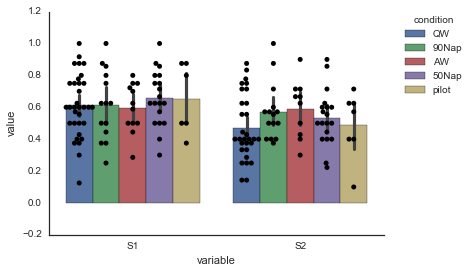

In [139]:
%R sess_ws.m <- melt(summary,id.vars='condition', measure.vars=c('non_w_s_1_v_all','non_w_s_2_v_all'))
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="condition")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="condition", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[5:10], labels[5:10], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='condition')

In [140]:
%%R
options(repr.plot.width=20, repr.plot.height=10)

#### Average Percent Correct, non words

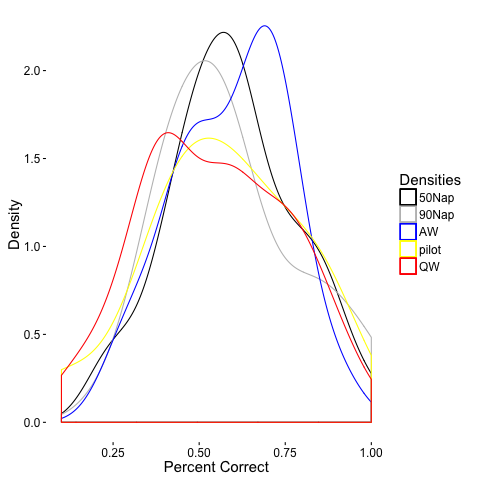

In [141]:
%%R
m <- ggplot(wordseg.m, aes(x = value))
m + geom_density(data=subset(wordseg.m, condition == '50Nap'), aes(colour="50Nap"))+
geom_density(data=subset(wordseg.m, condition == '90Nap'), aes(colour="90Nap"))+
geom_density(data=subset(wordseg.m, condition == 'AW'), aes(colour="AW"))+
geom_density(data=subset(wordseg.m, condition == 'pilot'), aes(colour="pilot"))+
geom_density(data=subset(wordseg.m, condition == 'QW'), aes(colour="QW"))+
scale_colour_manual(values=c("50Nap"="black", "90Nap"="grey", "AW"="blue", "pilot"="yellow", "QW"="red"), name="Densities") +
scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Learning scores by session

In [142]:
%%R
#one sample t-test (regarless of version, age, condition), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 4.7816, df = 164, p-value = 3.847e-06
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5428338 0.6030939
sample estimates:
mean of x 
0.5729638 



In [143]:
%%R
#one sample t-test session 1 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_all
t = 5.9907, df = 83, p-value = 5.169e-08
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5823202 0.6641495
sample estimates:
mean of x 
0.6232348 



In [144]:
%%R
#one sample t-test session 2 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_2_v_all
t = 0.98162, df = 80, p-value = 0.3292
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4785999 0.5630619
sample estimates:
mean of x 
0.5208309 



In [145]:
%%R
#one sample t-test session 1, 50Nap (both versions)
t.test(cond_50nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_50nap$non_w_s_1_v_all
t = 3.9325, df = 18, p-value = 0.000976
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5731613 0.7409991
sample estimates:
mean of x 
0.6570802 



In [146]:
%%R
#one sample t-test session 1, 90Nap (both versions)
t.test(cond_90nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_90nap$non_w_s_1_v_all
t = 1.9426, df = 13, p-value = 0.07404
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4871764 0.7416217
sample estimates:
mean of x 
0.6143991 



In [147]:
%%R
#one sample t-test session 1, AW (both versions)
t.test(cond_aw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_aw$non_w_s_1_v_all
t = 2.1737, df = 11, p-value = 0.05243
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4987827 0.6954867
sample estimates:
mean of x 
0.5971347 



In [148]:
%%R
#one sample t-test session 1, pilot (both versions)
t.test(cond_pilot$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_pilot$non_w_s_1_v_all
t = 1.7085, df = 5, p-value = 0.1482
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4222101 0.8861232
sample estimates:
mean of x 
0.6541667 



In [149]:
%%R
#one sample t-test session 1, QW (both versions)
t.test(cond_qw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_qw$non_w_s_1_v_all
t = 3.2708, df = 32, p-value = 0.00257
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5420104 0.6807169
sample estimates:
mean of x 
0.6113636 



### Part Words Percent Correct

In [150]:
# prepare PART WORD data 
%R wordseg.m <- melt(summary,id.vars='condition', measure.vars=c('part_w_s_1_v_all','part_w_s_2_v_all'))
%R head(wordseg.m)

,condition,variable,value
1,QW,part_w_s_1_v_all,0.25
2,QW,part_w_s_1_v_all,0.50
3,QW,part_w_s_1_v_all,0.60
4,QW,part_w_s_1_v_all,0.60
5,QW,part_w_s_1_v_all,0.60
6,QW,part_w_s_1_v_all,1.00


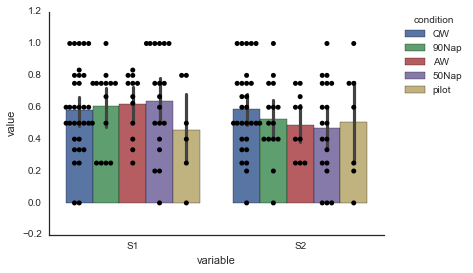

In [151]:
%R sess_ws.m <- melt(summary,id.vars='condition', measure.vars=c('part_w_s_1_v_all','part_w_s_2_v_all'))
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="condition")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="condition", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[5:10], labels[5:10], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='condition')

#### Average percent correct, part words

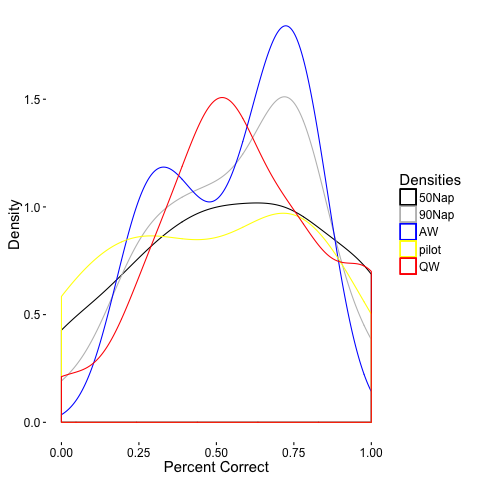

In [152]:
%%R
m <- ggplot(wordseg.m, aes(x = value))
m + geom_density(data=subset(wordseg.m, condition == '50Nap'), aes(colour="50Nap"))+
geom_density(data=subset(wordseg.m, condition == '90Nap'), aes(colour="90Nap"))+
geom_density(data=subset(wordseg.m, condition == 'AW'), aes(colour="AW"))+
geom_density(data=subset(wordseg.m, condition == 'pilot'), aes(colour="pilot"))+
geom_density(data=subset(wordseg.m, condition == 'QW'), aes(colour="QW"))+
scale_colour_manual(values=c("50Nap"="black", "90Nap"="grey", "AW"="blue", "pilot"="yellow", "QW"="red"), name="Densities") +
scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Learning scores by session, part words

In [153]:
%%R
#one sample t-test (regarless of version, age, condition), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 2.9235, df = 163, p-value = 0.003954
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5202024 0.6042894
sample estimates:
mean of x 
0.5622459 



In [154]:
%%R
#one sample t-test session 1 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_all
t = 5.9907, df = 83, p-value = 5.169e-08
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5823202 0.6641495
sample estimates:
mean of x 
0.6232348 



In [155]:
%%R
#one sample t-test session 2 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_2_v_all
t = 0.98162, df = 80, p-value = 0.3292
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4785999 0.5630619
sample estimates:
mean of x 
0.5208309 



In [156]:
%%R
#one sample t-test session 1, 50Nap (both versions)
t.test(cond_50nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_50nap$non_w_s_1_v_all
t = 3.9325, df = 18, p-value = 0.000976
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5731613 0.7409991
sample estimates:
mean of x 
0.6570802 



In [157]:
%%R
#one sample t-test session 1, 90Nap (both versions)
t.test(cond_90nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_90nap$non_w_s_1_v_all
t = 1.9426, df = 13, p-value = 0.07404
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4871764 0.7416217
sample estimates:
mean of x 
0.6143991 



In [158]:
%%R
#one sample t-test session 1, AW (both versions)
t.test(cond_aw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_aw$non_w_s_1_v_all
t = 2.1737, df = 11, p-value = 0.05243
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4987827 0.6954867
sample estimates:
mean of x 
0.5971347 



In [159]:
%%R
#one sample t-test session 1, pilot (both versions)
t.test(cond_pilot$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_pilot$non_w_s_1_v_all
t = 1.7085, df = 5, p-value = 0.1482
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4222101 0.8861232
sample estimates:
mean of x 
0.6541667 



In [160]:
%%R
#one sample t-test session 1, QW (both versions)
t.test(cond_qw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_qw$non_w_s_1_v_all
t = 3.2708, df = 32, p-value = 0.00257
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5420104 0.6807169
sample estimates:
mean of x 
0.6113636 



### order_TP33 Percent Correct

In [161]:
# prepare PART WORD data 
%R wordseg.m <- melt(summary,id.vars='condition', measure.vars=c('order_TP33_s_1_v_all','order_TP33_s_2_v_all'))
%R head(wordseg.m)

,condition,variable,value
1,QW,order_TP33_s_1_v_all,0.666667
2,QW,order_TP33_s_1_v_all,0.666667
3,QW,order_TP33_s_1_v_all,0.416667
4,QW,order_TP33_s_1_v_all,0.416667
5,QW,order_TP33_s_1_v_all,0.416667
6,QW,order_TP33_s_1_v_all,0.333333


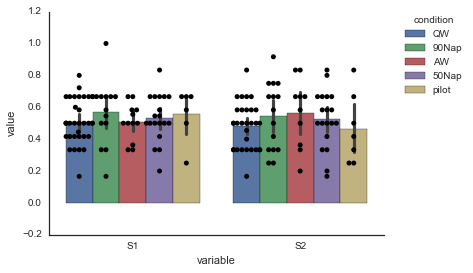

In [162]:
%R sess_ws.m <- melt(summary,id.vars='condition', measure.vars=c('order_TP33_s_1_v_all','order_TP33_s_2_v_all'))
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="condition")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="condition", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[5:10], labels[5:10], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='condition')

#### Average Percent correct, Order_TP33

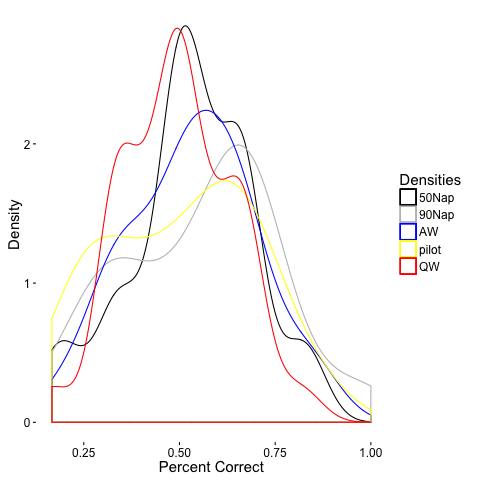

In [163]:
%%R
m <- ggplot(wordseg.m, aes(x = value))
m + geom_density(data=subset(wordseg.m, condition == '50Nap'), aes(colour="50Nap"))+
geom_density(data=subset(wordseg.m, condition == '90Nap'), aes(colour="90Nap"))+
geom_density(data=subset(wordseg.m, condition == 'AW'), aes(colour="AW"))+
geom_density(data=subset(wordseg.m, condition == 'pilot'), aes(colour="pilot"))+
geom_density(data=subset(wordseg.m, condition == 'QW'), aes(colour="QW"))+
scale_colour_manual(values=c("50Nap"="black", "90Nap"="grey", "AW"="blue", "pilot"="yellow", "QW"="red"), name="Densities") +
scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Learning scores by session, order_TP33

In [164]:
%%R
#one sample t-test (regarless of version, age, condition), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 1.5626, df = 164, p-value = 0.1201
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4946892 0.5455985
sample estimates:
mean of x 
0.5201439 



In [165]:
%%R
#one sample t-test session 1 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_all
t = 5.9907, df = 83, p-value = 5.169e-08
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5823202 0.6641495
sample estimates:
mean of x 
0.6232348 



In [166]:
%%R
#one sample t-test session 2 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_2_v_all
t = 0.98162, df = 80, p-value = 0.3292
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4785999 0.5630619
sample estimates:
mean of x 
0.5208309 



In [167]:
%%R
#one sample t-test session 1, 50Nap (both versions)
t.test(cond_50nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_50nap$non_w_s_1_v_all
t = 3.9325, df = 18, p-value = 0.000976
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5731613 0.7409991
sample estimates:
mean of x 
0.6570802 



In [168]:
%%R
#one sample t-test session 1, 90Nap (both versions)
t.test(cond_90nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_90nap$non_w_s_1_v_all
t = 1.9426, df = 13, p-value = 0.07404
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4871764 0.7416217
sample estimates:
mean of x 
0.6143991 



In [169]:
%%R
#one sample t-test session 1, AW (both versions)
t.test(cond_aw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_aw$non_w_s_1_v_all
t = 2.1737, df = 11, p-value = 0.05243
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4987827 0.6954867
sample estimates:
mean of x 
0.5971347 



In [170]:
%%R
#one sample t-test session 1, pilot (both versions)
t.test(cond_pilot$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_pilot$non_w_s_1_v_all
t = 1.7085, df = 5, p-value = 0.1482
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4222101 0.8861232
sample estimates:
mean of x 
0.6541667 



In [171]:
%%R
#one sample t-test session 1, QW (both versions)
t.test(cond_qw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_qw$non_w_s_1_v_all
t = 3.2708, df = 32, p-value = 0.00257
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5420104 0.6807169
sample estimates:
mean of x 
0.6113636 



### three_1nov_1cong Percent Correct

In [172]:
# prepare PART WORD data 
%R wordseg.m <- melt(summary,id.vars='condition', measure.vars=c('three_1nov_1cong_s_1_v_all','three_1nov_1cong_s_2_v_all'))
%R head(wordseg.m)

,condition,variable,value
1,QW,three_1nov_1cong_s_1_v_all,0.333333
2,QW,three_1nov_1cong_s_1_v_all,0.555556
3,QW,three_1nov_1cong_s_1_v_all,0.333333
4,QW,three_1nov_1cong_s_1_v_all,0.333333
5,QW,three_1nov_1cong_s_1_v_all,0.333333
6,QW,three_1nov_1cong_s_1_v_all,0.666667


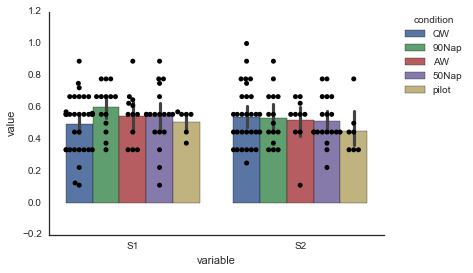

In [173]:
%R sess_ws.m <- melt(summary,id.vars='condition', measure.vars=c('three_1nov_1cong_s_1_v_all','three_1nov_1cong_s_2_v_all'))
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="condition")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="condition", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[5:10], labels[5:10], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='condition')

#### Average Percent correct, three_1nov_1cong

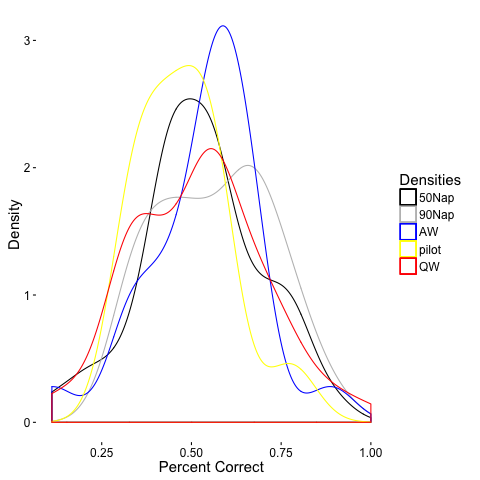

In [174]:
%%R
m <- ggplot(wordseg.m, aes(x = value))
m + geom_density(data=subset(wordseg.m, condition == '50Nap'), aes(colour="50Nap"))+
geom_density(data=subset(wordseg.m, condition == '90Nap'), aes(colour="90Nap"))+
geom_density(data=subset(wordseg.m, condition == 'AW'), aes(colour="AW"))+
geom_density(data=subset(wordseg.m, condition == 'pilot'), aes(colour="pilot"))+
geom_density(data=subset(wordseg.m, condition == 'QW'), aes(colour="QW"))+
scale_colour_manual(values=c("50Nap"="black", "90Nap"="grey", "AW"="blue", "pilot"="yellow", "QW"="red"), name="Densities") +
scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Learning scores by session, three_1nov_1cong

In [175]:
%%R
#one sample t-test (regarless of version, age, condition), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 2.0808, df = 164, p-value = 0.03901
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5013942 0.5532142
sample estimates:
mean of x 
0.5273042 



In [176]:
%%R
#one sample t-test session 1 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_all
t = 5.9907, df = 83, p-value = 5.169e-08
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5823202 0.6641495
sample estimates:
mean of x 
0.6232348 



In [177]:
%%R
#one sample t-test session 2 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_2_v_all
t = 0.98162, df = 80, p-value = 0.3292
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4785999 0.5630619
sample estimates:
mean of x 
0.5208309 



In [178]:
%%R
#one sample t-test session 1, 50Nap (both versions)
t.test(cond_50nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_50nap$non_w_s_1_v_all
t = 3.9325, df = 18, p-value = 0.000976
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5731613 0.7409991
sample estimates:
mean of x 
0.6570802 



In [179]:
%%R
#one sample t-test session 1, 90Nap (both versions)
t.test(cond_90nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_90nap$non_w_s_1_v_all
t = 1.9426, df = 13, p-value = 0.07404
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4871764 0.7416217
sample estimates:
mean of x 
0.6143991 



In [180]:
%%R
#one sample t-test session 1, AW (both versions)
t.test(cond_aw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_aw$non_w_s_1_v_all
t = 2.1737, df = 11, p-value = 0.05243
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4987827 0.6954867
sample estimates:
mean of x 
0.5971347 



In [181]:
%%R
#one sample t-test session 1, pilot (both versions)
t.test(cond_pilot$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_pilot$non_w_s_1_v_all
t = 1.7085, df = 5, p-value = 0.1482
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4222101 0.8861232
sample estimates:
mean of x 
0.6541667 



In [182]:
%%R
#one sample t-test session 1, QW (both versions)
t.test(cond_qw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_qw$non_w_s_1_v_all
t = 3.2708, df = 32, p-value = 0.00257
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5420104 0.6807169
sample estimates:
mean of x 
0.6113636 



### three_2nov_1cong_1incong Percent Correct

In [183]:
# prepare PART WORD data 
%R wordseg.m <- melt(summary,id.vars='condition', measure.vars=c('three_2nov_1cong_1incong_s_1_v_all','three_2nov_1cong_1incong_s_2_v_all'))
%R head(wordseg.m)

,condition,variable,value
1,QW,three_2nov_1cong_1incong_s_1_v_all,0.600000
2,QW,three_2nov_1cong_1incong_s_1_v_all,0.500000
3,QW,three_2nov_1cong_1incong_s_1_v_all,0.833333
4,QW,three_2nov_1cong_1incong_s_1_v_all,0.833333
5,QW,three_2nov_1cong_1incong_s_1_v_all,0.666667
6,QW,three_2nov_1cong_1incong_s_1_v_all,0.500000


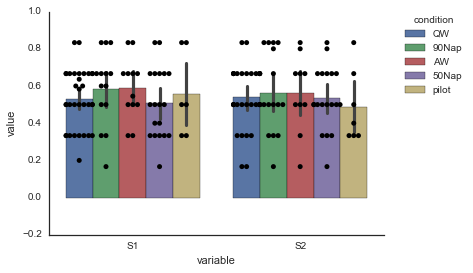

In [184]:
%R sess_ws.m <- melt(summary,id.vars='condition', measure.vars=c('three_2nov_1cong_1incong_s_1_v_all','three_2nov_1cong_1incong_s_2_v_all'))
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="condition")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="condition", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[5:10], labels[5:10], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='condition')

#### Average Percent correct, three_2nov_1cong_1incong

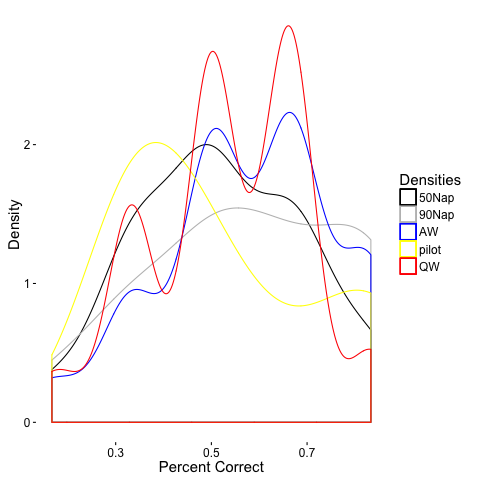

In [185]:
%%R
m <- ggplot(wordseg.m, aes(x = value))
m + geom_density(data=subset(wordseg.m, condition == '50Nap'), aes(colour="50Nap"))+
geom_density(data=subset(wordseg.m, condition == '90Nap'), aes(colour="90Nap"))+
geom_density(data=subset(wordseg.m, condition == 'AW'), aes(colour="AW"))+
geom_density(data=subset(wordseg.m, condition == 'pilot'), aes(colour="pilot"))+
geom_density(data=subset(wordseg.m, condition == 'QW'), aes(colour="QW"))+
scale_colour_manual(values=c("50Nap"="black", "90Nap"="grey", "AW"="blue", "pilot"="yellow", "QW"="red"), name="Densities") +
scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Learning scores by session, three_2nov_1cong_1incong

In [186]:
%%R
#one sample t-test (regarless of version, age, condition), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 3.0235, df = 164, p-value = 0.002901
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5146454 0.5697807
sample estimates:
mean of x 
 0.542213 



In [187]:
%%R
#one sample t-test session 1 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_all
t = 5.9907, df = 83, p-value = 5.169e-08
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5823202 0.6641495
sample estimates:
mean of x 
0.6232348 



In [188]:
%%R
#one sample t-test session 2 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_2_v_all
t = 0.98162, df = 80, p-value = 0.3292
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4785999 0.5630619
sample estimates:
mean of x 
0.5208309 



In [189]:
%%R
#one sample t-test session 1, 50Nap (both versions)
t.test(cond_50nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_50nap$non_w_s_1_v_all
t = 3.9325, df = 18, p-value = 0.000976
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5731613 0.7409991
sample estimates:
mean of x 
0.6570802 



In [190]:
%%R
#one sample t-test session 1, 90Nap (both versions)
t.test(cond_90nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_90nap$non_w_s_1_v_all
t = 1.9426, df = 13, p-value = 0.07404
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4871764 0.7416217
sample estimates:
mean of x 
0.6143991 



In [191]:
%%R
#one sample t-test session 1, AW (both versions)
t.test(cond_aw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_aw$non_w_s_1_v_all
t = 2.1737, df = 11, p-value = 0.05243
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4987827 0.6954867
sample estimates:
mean of x 
0.5971347 



In [192]:
%%R
#one sample t-test session 1, pilot (both versions)
t.test(cond_pilot$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_pilot$non_w_s_1_v_all
t = 1.7085, df = 5, p-value = 0.1482
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4222101 0.8861232
sample estimates:
mean of x 
0.6541667 



In [193]:
%%R
#one sample t-test session 1, QW (both versions)
t.test(cond_qw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_qw$non_w_s_1_v_all
t = 3.2708, df = 32, p-value = 0.00257
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5420104 0.6807169
sample estimates:
mean of x 
0.6113636 



### three_2nov_2cong Percent Correct

In [194]:
# prepare PART WORD data 
%R wordseg.m <- melt(summary,id.vars='condition', measure.vars=c('three_2nov_2cong_s_1_v_all','three_2nov_2cong_s_2_v_all'))
%R head(wordseg.m)

,condition,variable,value
1,QW,three_2nov_2cong_s_1_v_all,0.500000
2,QW,three_2nov_2cong_s_1_v_all,0.833333
3,QW,three_2nov_2cong_s_1_v_all,0.666667
4,QW,three_2nov_2cong_s_1_v_all,0.666667
5,QW,three_2nov_2cong_s_1_v_all,0.833333
6,QW,three_2nov_2cong_s_1_v_all,0.500000


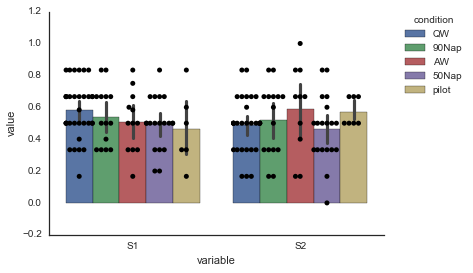

In [195]:
%R sess_ws.m <- melt(summary,id.vars='condition', measure.vars=c('three_2nov_2cong_s_1_v_all','three_2nov_2cong_s_2_v_all'))
my_table = %R sess_ws.m
sns.set_style("white")
ax = sns.barplot(x="variable", y="value", data=my_table, hue="condition")
ax = sns.swarmplot(x="variable", y="value", data=my_table, hue="condition", split=True, palette=sns.color_palette(["Black"]))
sns.despine()
plt.xticks([0, 1], ['S1', 'S2'])
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[5:10], labels[5:10], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='condition')

#### Average Percent correct, three_2nov_2cong

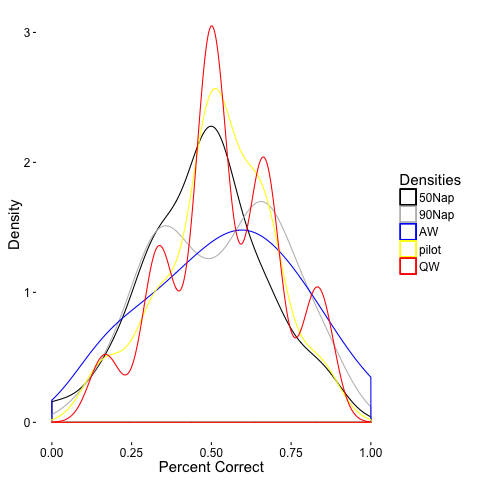

In [196]:
%%R
m <- ggplot(wordseg.m, aes(x = value))
m + geom_density(data=subset(wordseg.m, condition == '50Nap'), aes(colour="50Nap"))+
geom_density(data=subset(wordseg.m, condition == '90Nap'), aes(colour="90Nap"))+
geom_density(data=subset(wordseg.m, condition == 'AW'), aes(colour="AW"))+
geom_density(data=subset(wordseg.m, condition == 'pilot'), aes(colour="pilot"))+
geom_density(data=subset(wordseg.m, condition == 'QW'), aes(colour="QW"))+
scale_colour_manual(values=c("50Nap"="black", "90Nap"="grey", "AW"="blue", "pilot"="yellow", "QW"="red"), name="Densities") +
scale_y_continuous("Density") +
  scale_x_continuous("Percent Correct") +
  theme_classic()+
  theme(text = element_text(size = 15))+
  theme(axis.title.x = element_text(colour="black",size=15),
        axis.title.y = element_text(colour="black",size=15))

#### Learning scores by session, three_2nov_2cong

In [197]:
%%R
#one sample t-test (regarless of version, age, condition), 50% chance 
t.test(wordseg.m$value, mu=.5)


	One Sample t-test

data:  wordseg.m$value
t = 1.43, df = 164, p-value = 0.1546
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4918831 0.5507431
sample estimates:
mean of x 
0.5213131 



In [198]:
%%R
#one sample t-test session 1 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_1_v_all
t = 5.9907, df = 83, p-value = 5.169e-08
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5823202 0.6641495
sample estimates:
mean of x 
0.6232348 



In [199]:
%%R
#one sample t-test session 2 all (both versions, all conditions), 50% chance 
t.test(summary$non_w_s_2_v_all, mu=.5)


	One Sample t-test

data:  summary$non_w_s_2_v_all
t = 0.98162, df = 80, p-value = 0.3292
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4785999 0.5630619
sample estimates:
mean of x 
0.5208309 



In [200]:
%%R
#one sample t-test session 1, 50Nap (both versions)
t.test(cond_50nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_50nap$non_w_s_1_v_all
t = 3.9325, df = 18, p-value = 0.000976
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5731613 0.7409991
sample estimates:
mean of x 
0.6570802 



In [201]:
%%R
#one sample t-test session 1, 90Nap (both versions)
t.test(cond_90nap$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_90nap$non_w_s_1_v_all
t = 1.9426, df = 13, p-value = 0.07404
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4871764 0.7416217
sample estimates:
mean of x 
0.6143991 



In [202]:
%%R
#one sample t-test session 1, AW (both versions)
t.test(cond_aw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_aw$non_w_s_1_v_all
t = 2.1737, df = 11, p-value = 0.05243
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4987827 0.6954867
sample estimates:
mean of x 
0.5971347 



In [203]:
%%R
#one sample t-test session 1, pilot (both versions)
t.test(cond_pilot$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_pilot$non_w_s_1_v_all
t = 1.7085, df = 5, p-value = 0.1482
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.4222101 0.8861232
sample estimates:
mean of x 
0.6541667 



In [204]:
%%R
#one sample t-test session 1, QW (both versions)
t.test(cond_qw$non_w_s_1_v_all, mu=.5)


	One Sample t-test

data:  cond_qw$non_w_s_1_v_all
t = 3.2708, df = 32, p-value = 0.00257
alternative hypothesis: true mean is not equal to 0.5
95 percent confidence interval:
 0.5420104 0.6807169
sample estimates:
mean of x 
0.6113636 

